# Исследование надежности клиентов банка

## Контекст

Заказчик — кредитный отдел банка. 

**Задача**: **Нужно разобраться, что влияет на факт погашения кредита в срок.** Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.


*Примечание*. Это вторая версия выполнения проекта два года спустя. Он значительно дополнен, в том числе для развития навыков и решения поставленных себе задач, и датасет более подробно проанализирован. Отличия первой и второй версии указаны в конце проекта. Ссылка на первый [тут](). 

_______________________________________________________________________________________________________________________


**Персональные учебные задачи**: 
* подробно исследовать "проблемный" столбец с отрицательными значениями стажа,
* сделать функции для построения графиков,
* научиться строить графики рядом друг с другом.

## Содержание
1. [Загрузка библиотек и данных](#step1)  


2. [Очистка и подготовка данных](#step2)

    2.1 [Переменные булева типа](#step2.1) 
    
    2.2 [Категориальные переменные](#step2.2)   
    
    2.3 [Числовые переменные](#step2.3)    
    
    2.4 [Тип объект](#step2.4)
    
    
3. [Исследовательский анализ данных](#step3)

    3.1 [Данные в разрезе категорий (одномерный анализ)](#step3.1)
    
    3.2 [Исследование дохода по категориям (двумерный анализ)](#step3.2)
    
    3.3 [Исследование наличия задолженности по категориям (двумерный анализ)](#step3.3)
    
    
4. [Выводы по поставленной задаче](#step4)


5. [Сравнение двух версий выполнения проекта](#step5)


## 1. Загрузка библиотек и данных<a id="step1"></a>   

In [391]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [392]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress=True)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
sns.set_palette('Set2')


In [393]:
import os
os.chdir('F:/Dasha/da/data/')

Сделаем разные переменные для изначального датасета `clietns_raw` и того, который будем чистить и исследовать `clients`, чтобы, при необходимости, их сравнить.

In [394]:
clients_raw = pd.read_csv('pr_clients.csv')
clients_raw.shape

(21525, 12)

In [395]:
clients_raw.sample(n=10)
clients_raw.info()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
1273,0,-2411.525,48,среднее,1,гражданский брак,1,F,сотрудник,0,183958.684,сыграть свадьбу
18805,0,-1959.556,34,среднее,1,гражданский брак,1,M,сотрудник,0,91294.991,операции с жильем
381,0,-5966.902,44,высшее,0,женат / замужем,0,M,сотрудник,0,171859.927,покупка жилья
7045,1,-119.149,41,ВЫСШЕЕ,0,в разводе,3,F,компаньон,0,154458.685,строительство жилой недвижимости
14351,0,-2258.791,57,среднее,1,Не женат / не замужем,4,M,сотрудник,0,139897.566,сделка с подержанным автомобилем
996,0,-276.993,43,среднее,1,женат / замужем,0,F,сотрудник,0,104862.268,получение высшего образования
2484,2,-337.382,40,среднее,1,женат / замужем,0,M,компаньон,0,87504.053,получение высшего образования
12001,1,-3334.788,54,среднее,1,женат / замужем,0,F,компаньон,0,227708.101,заняться образованием
20829,1,398206.632,40,среднее,1,женат / замужем,0,F,пенсионер,0,39107.908,получение образования
8237,2,-2021.338,32,неоконченное высшее,2,женат / замужем,0,M,сотрудник,1,204334.012,операции с жильем


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [396]:
clients_raw.columns

Index(['children', 'days_employed', 'dob_years', 'education', 'education_id',
       'family_status', 'family_status_id', 'gender', 'income_type', 'debt',
       'total_income', 'purpose'],
      dtype='object')

In [397]:
clients_raw.isnull().sum()
clients_raw.duplicated().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

54

Сделаем копию датасета, переименуем столбец с возрастом и отбросим дубликаты.

In [398]:
clients = clients_raw.copy()

In [399]:
clients.rename(columns={'dob_years':'age'}, inplace=True)

In [400]:
clients.drop_duplicates(inplace=True)
clients.shape

(21471, 12)

#### Предварительный обзор данных 

Есть следующие данные по каждому клиенту: 
* пол (`gender`), 
* их возраст (`dob_years` переименовано в `age`), 
* тип образования (`education` и `education_id`), 
* семейное положение ( `family_status` и `family_status_id`), 
* количество детей (`children`), 
* продолжительность занятости в днях (`days_employed`), 
* тип дохода (`income_type`), 
* ежемесячный доход (`total_income`),
* почему взяли кредит (`цель`) и 
* имели ли задолженность по кредитам (`debt`).

Набор данных - 21471 строки после отбрасывания очевидных дубликатов (54 строки), временной промежуток отсутствует. Большинство столбцов являются категориями. 

Только два столбца имеют пропущенные значения - `days_employed` и `total_income`; эти же столбцы имеют формат float с 6 цифрами после точки, что требует дальнейшего изучения и очистки. Кроме того, `days_employed` имеет отрицательные значения, которые необходимо уточнить.

Необходимые замены типов данных:
* на bool: `debt`;
* на category: `education`, `education_id`, `family_status`, `family_status_id`, `gender`, `income_type`;
* на int64: `days_employed`, `total_income`.

Кроме того, можно выделить категории возраста, дохода и целей взятия кредита в отдельные столбцы.

## 2. Очистка и подготовка данных<a id="step2"></a>   

Будем чистить данные по типам и по столбцам, строя распределение признаков, где необходимо.

### 2.1 Переменные булева типа<a id="step2.1"></a>   

Столбец `debt` - это наша целевая переменная. Пропусков там нет, поэтому посмотрим, как распределяются значения и переведем в `bool`

In [401]:
clients.debt.value_counts(normalize=True)

0   0.919
1   0.081
Name: debt, dtype: float64

Задолженность встречалась у 8% клиентов.

In [402]:
clients['debt'] = clients['debt'].astype('bool')
clients['debt'].dtype

dtype('bool')

### 2.2 Категориальные переменные<a id="step2.2"></a>   

Теперь посмотрим на категории, которые мы позже сможем использовать для заполнения пропусков в других столбцах. 

In [403]:
cat_cols = ['education', 'education_id', 'family_status', 'family_status_id', 'gender', 'children', 'income_type']
for col in cat_cols:
    print(col)
    print(clients[col].nunique())
    print(clients[col].unique())
    print(clients[col].value_counts())
    print()

education
15
['высшее' 'среднее' 'Среднее' 'СРЕДНЕЕ' 'ВЫСШЕЕ' 'неоконченное высшее'
 'начальное' 'Высшее' 'НЕОКОНЧЕННОЕ ВЫСШЕЕ' 'Неоконченное высшее'
 'НАЧАЛЬНОЕ' 'Начальное' 'Ученая степень' 'УЧЕНАЯ СТЕПЕНЬ'
 'ученая степень']
среднее                13705
высшее                  4710
СРЕДНЕЕ                  772
Среднее                  711
неоконченное высшее      668
ВЫСШЕЕ                   273
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
Ученая степень             1
УЧЕНАЯ СТЕПЕНЬ             1
Name: education, dtype: int64

education_id
5
[0 1 2 3 4]
1    15188
0     5251
2      744
3      282
4        6
Name: education_id, dtype: int64

family_status
5
['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'Не женат / не замужем']
женат / замужем          12344
гражданский брак          4163
Не женат / не замуж

Сразу можно заметить, что в датасете встречаются группы, представленные крайне малым количеством наблюдений:
* 6 человек с ученой степенью,
* 1 человек без указания пола, 
* типы дохода - безработный (2 человека), предприниматель (2), студент и в декрете (по одному)
* 5 детей (9 строк).

Учитывая, что этих строк крайне мало, можно их удалить.

Кроме того, надо перевести `education` и `family_status` в нижний регистр, а потом проверить, соответствуют ли они своим ids.  

В столбце `children` надо исправить значения -1 ( 47 строк) и 20 (76 строк) на 1 и 2 соответственно. 

Сначала  **образование**.

In [404]:
clients.education = clients.education.str.lower().str.strip()
clients.education.unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

In [405]:
for i in range(5):
    print(i, clients[clients['education_id'] == i]['education'].unique())

0 ['высшее']
1 ['среднее']
2 ['неоконченное высшее']
3 ['начальное']
4 ['ученая степень']


Соответствуют. Теперь удалим строки с ученой степенью.

In [406]:
educ_to_drop = clients.query('education == "ученая степень"').index
clients.drop(index = educ_to_drop, inplace=True)
clients.education.unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное'],
      dtype=object)

Готово. Теперь проверим по **семейному положению**.

In [407]:
clients.family_status = clients.family_status.str.lower().str.strip()
for i in range(5):
    print(i, clients[clients['family_status_id'] ==i]['family_status'].unique())

0 ['женат / замужем']
1 ['гражданский брак']
2 ['вдовец / вдова']
3 ['в разводе']
4 ['не женат / не замужем']


По семейному положению все в порядке. 


Теперь столбец **с полом**.

Встречается только одно значение `XNA`, удалим его.

In [408]:
gender_to_drop = clients.query('gender == "XNA"').index
clients.drop(index=gender_to_drop, inplace=True)
clients.gender.unique()

array(['F', 'M'], dtype=object)

Уберем строки по **типу дохода**.

In [409]:
inc_type_to_drop = clients.query('income_type in ("безработный", "предприниматель", "студент", "в декрете")').index
clients.drop(index = inc_type_to_drop, inplace=True)
clients.income_type.unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий'], dtype=object)

Сделаем замены в столбце с **количеством детей**. Удалим клиентов, у кого 5 детей, так как их всего 9. 

In [410]:
clients['children'] = clients['children'].replace(-1,1)
clients['children'] = clients['children'].replace(20,2)
clients.children.unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [411]:
chilren_5 = clients.query('children == 5').index
clients.drop(index=chilren_5, inplace=True)

Теперь можно добавить еще один столбец `has_children` со значениями 'yes', если есть дети, и 'no', если их нет. Потом назначим столбцам тип `category`.

In [412]:
def has_children(col):
    if col == 0:
        return 'no'
    else:
        return 'yes'
    
    
clients['has_children'] = clients['children'].apply(has_children).astype('category')

In [413]:
clients.has_children.value_counts(normalize=True)

no    0.657
yes   0.343
Name: has_children, dtype: float64

У 2/3 клиентов детей нет. Переведем остальные столбцы в категории.

In [414]:
for col in cat_cols:
    clients[col]= clients[col].astype('category')

clients[cat_cols].dtypes == 'category'

education           True
education_id        True
family_status       True
family_status_id    True
gender              True
children            True
income_type         True
dtype: bool

Столбцы приведены в нужный тип, можно переходить к числовым переменным.

### 2.3 Числовые переменные<a id="step2.3"></a>   

#### Столбец  `age` - возраст клиентов

Начнем с проверки уникальных значений и их распределения.

In [415]:
clients.age.sort_values().unique()

array([ 0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75], dtype=int64)

In [416]:
clients.age.describe()

count   21449.000
mean       43.281
std        12.574
min         0.000
25%        33.000
50%        42.000
75%        53.000
max        75.000
Name: age, dtype: float64

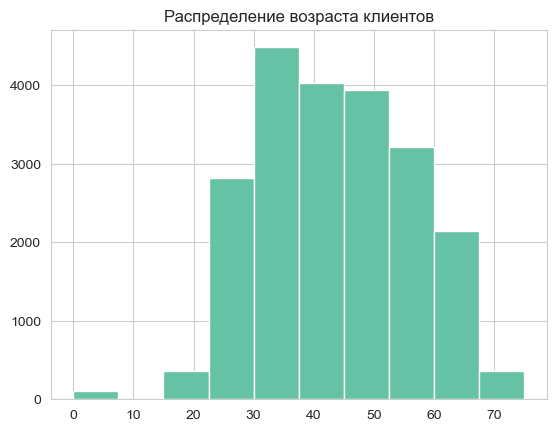

In [417]:
_ = clients.age.hist()
_ = plt.title('Распределение возраста клиентов')

Посмотрим количество строк с нулевым возрастом и в каком типе дохода он встречается.

In [418]:
len(clients.query('age == 0'))

101

In [419]:
clients.query('age == 0')['income_type'].unique()

['пенсионер', 'сотрудник', 'компаньон', 'госслужащий']
Categories (4, object): ['госслужащий', 'компаньон', 'пенсионер', 'сотрудник']

Посмотрим на базовые стат.показатели, чтобы проверим, можно ли использовать категорию по типу дохода для заполнения нулевого возраста.

In [420]:
clients.query('age!= 0').groupby('income_type')['age'].agg(['count', 'mean', 'median', 'min', 'max'])

,count,mean,median,min,max
income_type,,,,,
госслужащий,1449,40.823,40.000,19,75
компаньон,5057,39.858,39.000,19,74
пенсионер,3815,59.365,60.000,22,74
сотрудник,11027,40.006,39.000,19,74


Итого, сами значения соответствуют возможному возрасту, но есть 101 строка, где возраст равен 0. Предварительным обзор данных показал, что количество дней стажа имеет много отрицательных значений, мы не можем его использовать для группировки и заполнении "нулевого" возраста. Что касается типа дохода, там минимальные и максимальные значения возраста слишком сильно разнятся, поэтому лучше удалить строки, где возраст - 0.

In [421]:
zero_age = clients.query('age == 0').index
clients.drop(index = zero_age, inplace=True)

Еще посмотрим подолбнее возраст в группе пенсионеров, так как минимальное значение там показано 22.

In [422]:
clients.query('income_type == "пенсионер"')['age'].sort_values().unique()

array([22, 24, 26, 27, 28, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
       43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
       60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74],
      dtype=int64)

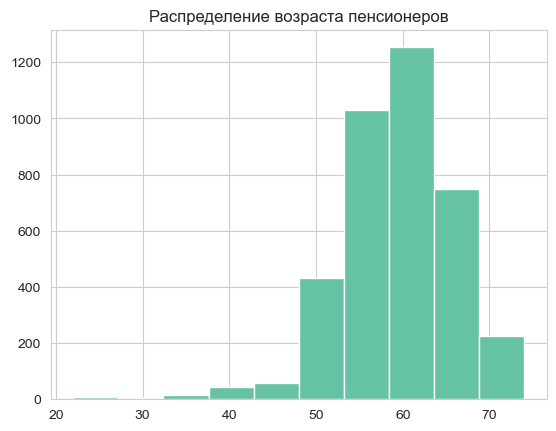

In [423]:
_ = clients.query('income_type == "пенсионер"')['age'].hist()
_ = plt.title('Распределение возраста пенсионеров')

Минимально возможный возраст выхода на пенсию у военных может быть 33 года, если они служили в местах, где стаж засчитывается в полуторном вплоть до тройного объема ([источник](https://dzen.ru/a/YAdnwiZ8PygLjLVH)). Остальным категориям групп граждан досрочный выход на пенсию доступен с 45 лет для женщин и 50 для мужчин при наличии отработанного стажа ([источник](https://sberbankaktivno.ru/journal/article/3289)).
Посмотрим, сколько клиентов в группах до 33, от 33 до 45 у женщин и от 33 до 50 у мужчин.

In [424]:
below_33 = clients.query('(income_type == "пенсионер") & (age < 33)').index
len(clients.loc[below_33, :])

12

In [425]:
bw_33_50_m = clients.query('(income_type == "пенсионер") & (33 <= age < 50) & gender == "M"').index
len(clients.loc[bw_33_50_m, :])

72

In [426]:
bw_33_45_f = clients.query('(income_type == "пенсионер") & (33 <= age < 45) & gender == "F"').index
len(clients.loc[bw_33_45_f, :])

37

В датасете 12 строк, где возраст пенсионера меньше 33 лет, 72 строки с данными клиентов мужчин в возрасте 33-50 и 37 женщин в возрасте 33-45. В целом гистограмма показывает, что гораздо больше клиентов пенсионеров в возрасте 50 лет и выше, что больше соответствует пенсионному возрасту. Учитывая, что теоретические последние две группы возможны и не очень многочисленны, их оставим, а 12 строк удалим.

Также можно было бы передать в отдел сбора данных, что, вероятно, тут что-то собирается с ошибкой.

In [427]:
clients.drop(index=below_33, inplace=True)

In [428]:
clients.groupby('income_type')['age'].agg(['count', 'mean', 'median', 'min', 'max'])

,count,mean,median,min,max
income_type,,,,,
госслужащий,1449,40.823,40.000,19,75
компаньон,5057,39.858,39.000,19,74
пенсионер,3803,59.464,60.000,33,74
сотрудник,11027,40.006,39.000,19,74


Минимальный возраст пенсионеров стал выше, но на среднем и медиане это не отразилось. 

Теперь переведем данные в тип `int64`.

In [429]:
clients['age'] = clients['age'].astype('int')

Столбец `age` готов к дальнейшему анализу.

#### Столбцы `days_employed` и `total_income`

Сначала посмотрим процент пропусков в столбцах `days_employed` и `total_income`. Так как количество пропусков одинаково в столбцах, можно проверить только на одном.

In [430]:
round(clients.total_income.isnull().sum()/len(clients), 3)

0.099

Итого, мы имеем 9.9% пропущенных значений. 

Посмотрим, одни и те же ли это строки в двух столбцах (например, нет справки с работы с этими данными).

In [431]:
days_nan_index = clients.index[clients.days_employed.isnull() == True] 
income_nan_index = clients.index[clients.total_income.isnull() == True]
days_nan_index.equals(income_nan_index)

True

Так и есть. Заодно проверим, как распределяется наличие задолженности по кредитам.

In [432]:
clients.loc[income_nan_index, :]['debt'].value_counts(normalize=True)

False   0.919
True    0.081
Name: debt, dtype: float64

По задолженности то же самое, что для всего датасета. Для того, чтобы перевести тип данных в `int64`, надо сначала заполнить пропуски. Исследуем столбцы подробрее и посмотрим базовые статистические показатели на наличие выбросов. 

Начнем с `days_employed`. Для удобства выделим столбец в отдельный датафрейм вместе с `age` (как наиболее логичный коррелирующий с ним) и сделаем новый столбец по количеству лет `years_employed`, и по нему выведем статистику. Округлим значения, чтобы убрать 6 знаков после запятой. 

In [433]:
emp_time = clients[['days_employed', 'age']].copy()
emp_time.head()

,days_employed,age
0,-8437.673,42
1,-4024.804,36
2,-5623.423,33
3,-4124.747,32
4,340266.072,53


In [434]:
emp_time['years_employed'] = (emp_time['days_employed']/365).round(1)
emp_time['years_employed'].unique()[:20]
                        
emp_time['years_employed'].describe()

array([ -23.1,  -11. ,  -15.4,  -11.3,  932.2,   -2.5,   -7.9,   -0.4,
        -19. ,   -6. ,  -11.4,   -2.2,    nan,   -5.1,   -2.7,   -4.7,
         -6.5, 1096.7,  -27.5,   -3.6])

count   19230.000
mean      172.256
std       385.459
min       -50.400
25%        -7.500
50%        -3.300
75%        -0.800
max      1100.700
Name: years_employed, dtype: float64

В столбце две проблемы: очень много отрицательных значений и очень большие цифры (1100 лет опыта максимально). Исследуем подробнее и для начала построим ящик с усами, чтобы посмотреть распределение значений.

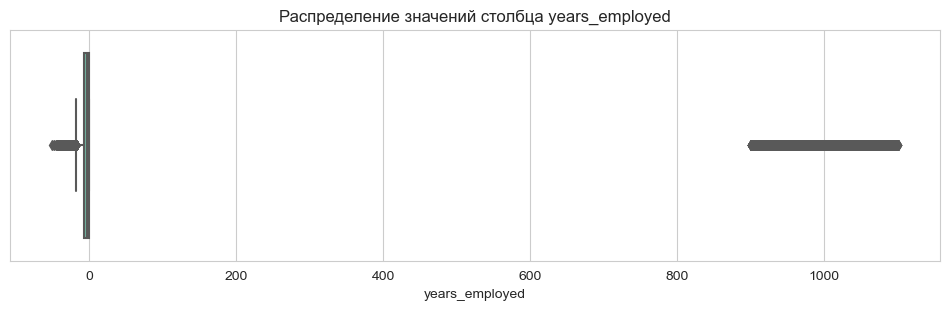

In [435]:
_ = plt.figure(figsize=(12,3))
_ = sns.boxplot(x='years_employed', data=emp_time)
_ = plt.title('Распределение значений столбца years_employed')

График показывает разрыв между 0 и примерно 900, проверим. Посмотрим максимальный возраст и в соответствии с ним возьмем максимально большой опыт, учитывая, что официально он может быть записан в трудовую с 14 лет. 

Посмотрим, вписываются ли отрицательные значения в максимальный опыт (если бы они были положительными), и построим график на "больше максимального опыта", посмотреть подробнее. 

Заодно посмотрим долю отрицательных и больших значений.

In [436]:
clients.age.max()

75

Допустим, что максимальный возможный опыт - 61 год. Выведем долю значений меньше 0, больше 61 и, чтобы убедиться, долю значений между 0 и 61, что соответствовало бы реальным данным.

Доля значений меньше 0: 0.74


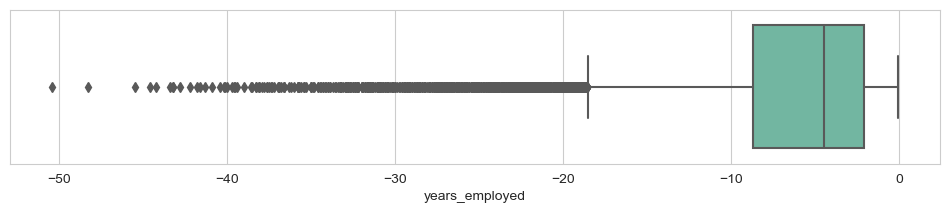

Доля значений больше 61: 0.16


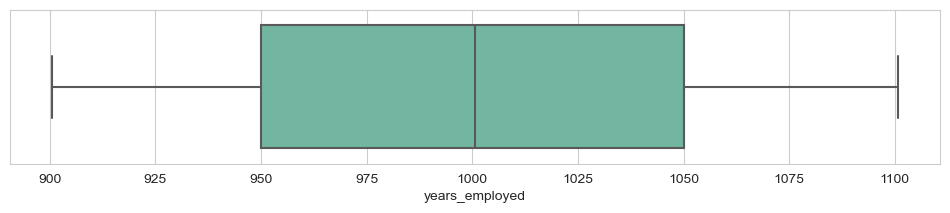

Доля значений между 0 и 61: 0.0


In [437]:
print('Доля значений меньше 0:', round((len(emp_time.query('years_employed < 0'))/len(clients)), 2))
_ = plt.figure(figsize=(12,2))
_ = sns.boxplot(x=emp_time.query('years_employed < 61')['years_employed'], data=emp_time)
plt.show()

print('Доля значений больше 61:', round((len(emp_time.query('years_employed > 61'))/len(clients)), 2))
_ = plt.figure(figsize=(12,2))
_ = sns.boxplot(x=emp_time.query('years_employed > 61')['years_employed'], data=emp_time)
plt.show()

print('Доля значений между 0 и 61:', round((len(emp_time.query('0 < years_employed < 61'))/len(emp_time)), 2))

Итого, 75% значений ниже нуля, 16% значений больше максимально возможного опыта (61 год) и между ними ничего нет (остальные - пропуски). При этом, распределение значений ниже нуля больше похоже на возможный опыт. 

Посмотрим, как значения ниже нуля и слишком высокие распределяются по возрастам. Для этого сделаем новый столбец `age_group` и посмотрим среднее для первой и для второй групп.

In [438]:
def age_group(val):
    if val < 25:
        return '20+'
    elif val >= 25 and val < 30:
        return '25+'
    elif val >= 30 and val < 35:
        return '30+'
    elif val >= 35 and val < 40:
        return '35+'
    elif val >= 40 and val < 45:
        return '40+'
    elif val >= 45 and val < 50:
        return '45+'
    elif val >= 50 and val < 55:
        return '50+'
    elif val >= 55 and val < 60:
        return '55+'
    elif val >= 60 and val < 65:
        return '60+'
    elif val >= 65 and val < 70:
        return '65+'
    elif val >= 70 and val < 75:
        return '70+'
    elif val >= 75 and val < 80:
        return '75+'
        
emp_time['age_group'] = emp_time.age.apply(age_group).astype('category')
emp_time['age_group'] = emp_time['age_group'].cat.reorder_categories(['20+','25+', '30+', '35+', 
                                                                      '40+', '45+', '50+', '55+', 
                                                                      '60+', '65+', '70+', '75+'])
emp_time.head()

,days_employed,age,years_employed,age_group
0,-8437.673,42,-23.100,40+
1,-4024.804,36,-11.000,35+
2,-5623.423,33,-15.400,30+
3,-4124.747,32,-11.300,30+
4,340266.072,53,932.200,50+


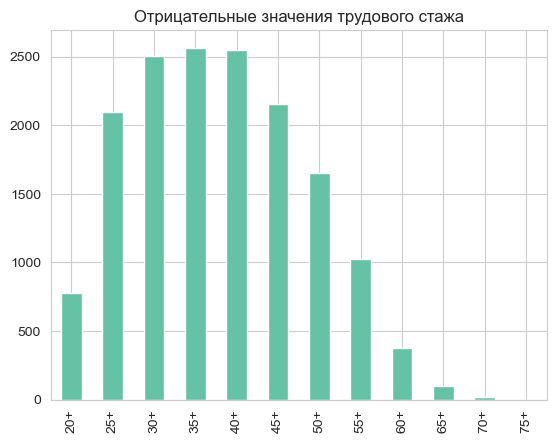

In [439]:
_ = emp_time.query('years_employed < 61')['age_group'].value_counts(sort=False).plot(kind='bar')
_ = plt.title('Отрицательные значения трудового стажа')

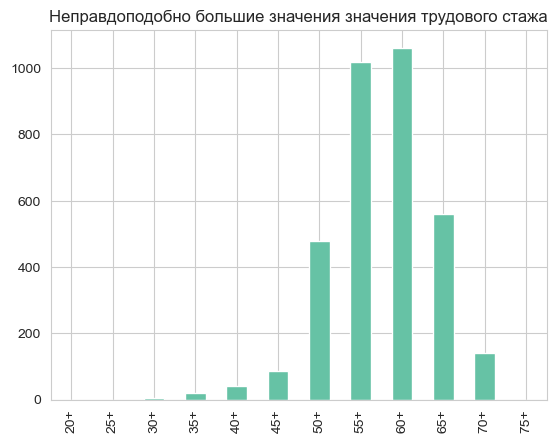

In [440]:
_ = emp_time.query('years_employed > 61')['age_group'].value_counts(sort=False).plot(kind='bar')
_ = plt.title('Неправдоподобно большие значения значения трудового стажа')

Отрицательные и неправдоподобно большие значения встречаются в обеих группах, но распределены по-разному. Отрицательных значений больше среди 20-50+ клиентов, а неправдоподобно больших - после 50+. 

Итого, значения столбца `days_employed` довольно противоречивы, так как значений, которые бы соотносились с адекватным опытом (5-61 год в соответствии с данными по возрасту) нет. 

С одной стороны, столбец можно удалить из датафрейма и не использовать для дальнейшего анализа. С другой стороные, можно предположить, что мы видим два типа ошибок (особенно учитывая, что изначально данные имеют 6 знаков после запятой, хотя дни должны быть целочисленными значениями) - отрицательные значения, и запятая, вставшая на два знака правее. Тогда можно внести правки, но иметь в виду, что данные были проблемными и применительно анализа на них можно ориентироваться с долей сомнения. 

Применим второй вариант. Затем добавим проверку, не является ли трудовой стаж больше возможного по возрасту. Потом посмотрим базовую статистику.

In [441]:
emp_time['years_employed'] = np.where(emp_time['years_employed'] > 61, emp_time['years_employed']/100, emp_time['years_employed'])
emp_time['years_employed'] = abs(emp_time['years_employed']).round()
emp_time['years_employed'].describe()

count   19230.000
mean        7.076
std         5.904
min         0.000
25%         2.000
50%         6.000
75%        10.000
max        50.000
Name: years_employed, dtype: float64

In [442]:
emp_time['max_employment'] = clients['age'] - 14
emp_time['max_employment'].sort_values().unique()
emp_time.head()

array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61])

,days_employed,age,years_employed,age_group,max_employment
0,-8437.673,42,23.000,40+,28
1,-4024.804,36,11.000,35+,22
2,-5623.423,33,15.000,30+,19
3,-4124.747,32,11.000,30+,18
4,340266.072,53,9.000,50+,39


Для проверки валидности трудового стажа сделаем новый столбец, `empl_validity` (`valid`, если опыт меньше или равен максимально возможному, `not valid`, если больше). Предварительно уберем пропуски, чтобы они не заполнились `not valid`. Затем, посмотрим долю валидного и невалидного стажа.

In [443]:
emp_time.dropna(inplace=True)
emp_time.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19230 entries, 0 to 21524
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   days_employed   19230 non-null  float64 
 1   age             19230 non-null  int32   
 2   years_employed  19230 non-null  float64 
 3   age_group       19230 non-null  category
 4   max_employment  19230 non-null  int32   
dtypes: category(1), float64(2), int32(2)
memory usage: 620.1 KB


In [444]:
emp_time['empl_validity'] = np.where(emp_time['years_employed'] <= emp_time['max_employment'], 'valid', 'not valid')
emp_time.head()

,days_employed,age,years_employed,age_group,max_employment,empl_validity
0,-8437.673,42,23.000,40+,28,valid
1,-4024.804,36,11.000,35+,22,valid
2,-5623.423,33,15.000,30+,19,valid
3,-4124.747,32,11.000,30+,18,valid
4,340266.072,53,9.000,50+,39,valid


In [445]:
emp_time.empl_validity.value_counts()

valid        19220
not valid       10
Name: empl_validity, dtype: int64

In [446]:
emp_time.query('empl_validity == "not valid"')

,days_employed,age,years_employed,age_group,max_employment,empl_validity
397,-12506.318,46,34.000,45+,32,not valid
2492,-13724.224,50,38.000,50+,36,not valid
3417,-5673.867,29,16.000,25+,15,not valid
4299,-17615.563,61,48.000,60+,47,not valid
5708,-13210.485,47,36.000,45+,33,not valid
5959,-10939.300,42,30.000,40+,28,not valid
13531,-9762.840,39,27.000,35+,25,not valid
16335,-18388.950,61,50.000,60+,47,not valid
19902,-8436.151,36,23.000,35+,22,not valid
20061,-12761.378,48,35.000,45+,34,not valid


И построим график по возрастным группам

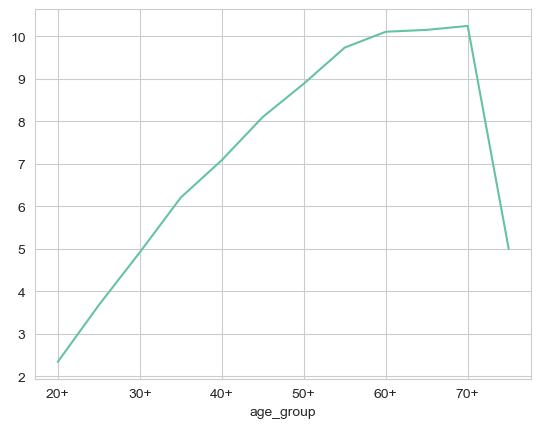

In [447]:
_ = emp_time.groupby('age_group')['years_employed'].mean().plot()

После преобразования столбца `days_employed` по базовой статистике мы получили, что средний трудовой стаж - 7 лет, медианный - 6, а 10 строк все равно показывают стаж, превышающий максимальный на 2-3 года. 

Судя по графику выше, средний стаж - не выше 10 лет даже в возрасте 60+, хотя можно было бы ожидать хотя бы лет 20. На основании этого, сделаем вывод, что даже после преобразований данные по трудовому стажу не выглядят убедительно, следовательно, столбец лучше удалить. 

In [448]:
clients.drop(['days_employed'], axis=1, inplace=True)

Теперь переходим к `total_income`. Выведем базовую статистику, построим ящик с усам и гистограмму посмотреть распределение значений.

In [449]:
clients['total_income'] = clients['total_income'].round()
clients['total_income'].describe(percentiles=[0.9, 0.95, 0.99]).round()

count     19230.000
mean     167487.000
std      103097.000
min       20667.000
50%      145048.000
90%      278502.000
95%      340906.000
99%      518569.000
max     2265604.000
Name: total_income, dtype: float64

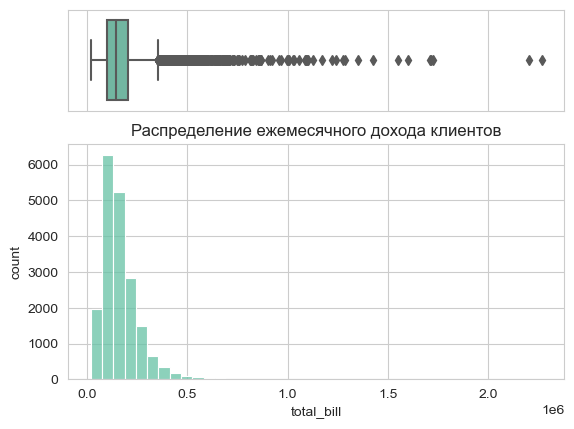

In [450]:
fig, (ax_box, ax_hist) = plt.subplots(2, sharex = True, 
                       gridspec_kw = {'height_ratios': (.3, .7)}) 
 
_ = sns.boxplot(x = clients['total_income'], ax = ax_box)
_ = sns.histplot(x = clients['total_income'], ax = ax_hist, bins = 40)
 
_ = ax_box.set(xlabel = '') 
_ = ax_hist.set(xlabel = 'total_bill')
_ = ax_hist.set(ylabel = 'count')
_ = plt.title('Распределение ежемесячного дохода клиентов')

Средний доход - 167 тыс., медианный - 145, 99% клиентов имеют доход не больше 518 тыс. Распределение скошено вправо, следовательно для заполнения пропусков лучше использовать медиану. 

Добавим столбец `age_group` и посмотрим, в какой возрастной группе и по какому типу дохода есть пропуски. 

In [451]:
clients['age_group'] =  clients.age.apply(age_group)
clients['age_group'].value_counts()

35+    2866
40+    2865
30+    2782
45+    2490
50+    2380
25+    2298
55+    2279
60+    1607
20+     872
65+     726
70+     170
75+       1
Name: age_group, dtype: int64

В датасете только один человек возрастом 75 и выше, можно удалить. 

In [452]:
over_75 = clients.query('age_group == "75+"').index
clients.drop(index=over_75, inplace=True)

Теперь переведем в категорию.

In [453]:
clients['age_group'] = clients['age_group'].astype('category')
clients['age_group'] = clients['age_group'].cat.reorder_categories(['20+','25+', '30+', '35+', 
                                                                      '40+', '45+', '50+', '55+', 
                                                                      '60+', '65+', '70+'])

In [454]:
clients[clients['total_income'].isnull()==True]['age_group'].unique()[:-1]

['65+', '40+', '60+', '50+', '20+', '30+', '35+', '45+', '25+', '55+']
Categories (11, object): ['20+', '25+', '30+', '35+', ..., '55+', '60+', '65+', '70+']

In [455]:
clients[clients['total_income'].isnull()==True]['income_type'].unique()

['пенсионер', 'госслужащий', 'компаньон', 'сотрудник']
Categories (4, object): ['госслужащий', 'компаньон', 'пенсионер', 'сотрудник']

Пропуски есть во всех возрастных группах и всех группах по типу дохода. Сделаем группировку по двум столбцам и заполним пропуски медианами.

In [456]:
clients['total_income'] = clients['total_income'].fillna(clients.groupby(['income_type', 'age_group'])['total_income']\
                                               .transform('median'))
clients['total_income'].isnull().sum()
clients['total_income'].describe()

0

count     21335.000
mean     165366.470
std       98272.623
min       20667.000
25%      107717.000
50%      144639.000
75%      195709.000
max     2265604.000
Name: total_income, dtype: float64

Теперь сравним, как поменялось распределение по сравнению с сырыми данными. Добавим туда столбец по возрастным группам и построим две гистограммы друг рядом с другом.

In [457]:
clients_raw['age_group'] =  clients_raw.dob_years.apply(age_group)

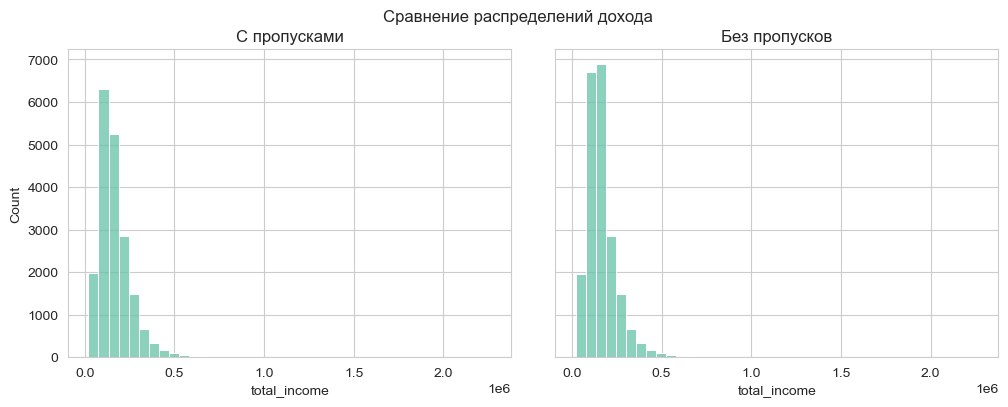

In [458]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12,4), sharey=True)
fig.subplots_adjust(wspace = 0.1)
_ = fig.suptitle('Сравнение распределений дохода')
_ = sns.histplot(x = clients_raw['total_income'], bins = 40, ax=ax[0])
_ = ax[0].set_title('С пропусками')
_ = sns.histplot(x = clients['total_income'], bins = 40, ax=ax[1])
_ = ax[1].set_title('Без пропусков')


Пропуски заполнились. При этом пик распределения вытянулся в третьем интервале. Сделаем таблицу с медианным доходом по возрастным группам и типам дохода двух датасетов и посмотрим среднюю разницу.

In [459]:
comp = clients_raw.groupby(['income_type', 'age_group'])['total_income'].agg(['median'])\
.join(clients.groupby(['income_type', 'age_group'])['total_income'].agg(['median']),lsuffix='_raw', rsuffix='_new')
comp['diff'] = comp.median_raw - comp.median_new
comp.sample(10)
comp['diff'].mean()
comp['diff'].median()

median_raw  median_new      diff
income_type age_group                                  
компаньон   25+        167366.592  167367.000    -0.408
пенсионер   35+        115598.588  115599.000    -0.412
госслужащий 35+        143718.243  145814.500 -2096.257
компаньон   65+        165555.228  165555.000     0.228
сотрудник   60+        142614.341  142614.000     0.341
компаньон   55+        167468.101  167468.000     0.101
госслужащий 45+        157726.839  157727.000    -0.161
пенсионер   60+        119725.263  119664.500    60.763
            55+        122812.512  122812.500     0.012
сотрудник   50+        137901.205  137901.000     0.205

777.9028209306139

0.02191604266408831

Средняя разница по группам не составляет более 778 руб. Видимо, это из-за размера групп, оставим.


Кроме того, очевидно, что в датасете присутствуют разные категории дохода клиентом. Добавим столбец `income_category` на основании следующего разделения:

* 0–30000 — 'E';
* 30001–50000 — 'D';
* 50001–200000 — 'C';
* 200001–1000000 — 'B';
* 1000001 и выше — 'A'.

In [460]:
def income_category(col):
    if col <=30000: 
        return 'E'
    elif col > 30000 and col <=50000:
        return 'D'
    elif col > 50000 and col <=200000:
        return 'C'
    elif col > 200000 and col <=1000000:
        return 'B'
    elif col > 1000000:
        return 'A'

clients['income_category'] = clients.total_income.apply(income_category).astype('category')
clients['income_category'] = clients['income_category'].cat.reorder_categories(['A', 'B', 'C', 'D', 'E'])
clients['income_category'].value_counts(sort=False)
clients['income_category'].isnull().sum()

A       25
B     5005
C    15936
D      347
E       22
Name: income_category, dtype: int64

0

Наиболее многочисленна группа с доходом от 50 до 200 тыс, малочисленные группы - доход более 1 млн (25 человек) и менее 30 тыс (22 человека).

Проверим еще раз датасет на пропуски.

In [461]:
clients.isnull().sum()

children            0
age                 0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
has_children        0
age_group           0
income_category     0
dtype: int64

Очистка числовых данных завершена, пропуски заполнены. 

### 2.4 Тип объект<a id="step2.4"></a>   

Осталось разделить цели взятия кредита `purpose` на категории. Сначала выведем уникальные значения.

In [462]:
clients.purpose.unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Можно выделить следующие категории:
* недвижимость (покупка жилья, операции с жильем, покупка жилой/ коммерческой недвижимости, строительство недвижимости, операции с недвижимостью, покупка жилья для сдачи, ремонт жилья)
* автомобиль (приобретение автомобиля, на покупку своего/ подержанного автомобиля, автомобиль)
* образование (дополнительное/ профильное образование, образование, заняться образованием, получение образования)
* свадьба

Сделаем функцию, которая по корню ключевого слова сделает категорию, выведем эту категорию в отдельный столбец и проверим, не появилось ли пропусков. 

In [463]:
def purpose_category(col):
    if 'недвижимост' in col or 'жиль' in col:
        return 'недвижимость'
    elif 'автомобил' in col:
        return 'автомобиль'
    elif 'образован' in col:
        return 'образование'
    elif 'свадьб' in col:
        return 'свадьба'
    
clients['purpose_category'] = clients['purpose'].apply(purpose_category).astype('category')
clients['purpose_category'].isnull().sum()

0

Проверим: выведем все варианты на каждую категорию причины кредита.

In [464]:
for cat in clients.purpose_category.unique().tolist():
    cat
    clients.loc[clients.purpose_category == cat, 'purpose'].unique()

'недвижимость'

array(['покупка жилья', 'операции с жильем', 'покупка жилья для семьи',
       'покупка недвижимости', 'покупка коммерческой недвижимости',
       'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'покупка своего жилья',
       'операции с недвижимостью', 'покупка жилья для сдачи',
       'ремонт жилью'], dtype=object)

'автомобиль'

array(['приобретение автомобиля', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля', 'автомобили',
       'сделка с подержанным автомобилем', 'автомобиль',
       'свой автомобиль', 'сделка с автомобилем', 'на покупку автомобиля'],
      dtype=object)

'образование'

array(['дополнительное образование', 'образование',
       'заняться образованием', 'получение образования',
       'получение дополнительного образования',
       'получение высшего образования', 'профильное образование',
       'высшее образование', 'заняться высшим образованием'], dtype=object)

'свадьба'

array(['сыграть свадьбу', 'на проведение свадьбы', 'свадьба'],
      dtype=object)

Все верно. 

Наконец, сравним, как изменился датафрейм после очистки и подготовки.

In [465]:
print('Ушло строк: ', len(clients_raw) - len(clients))
print('Прибавилось столбцов: ', len(clients.columns) - len(clients_raw.columns))

Ушло строк:  190
Прибавилось столбцов:  2


#### Итоги очистки и подготовки данных

* целевая переменная `debt` переведена в булев тип;
* категориальные столбцы `gender`, `income_type`, `education`, `education_id`, `family_status`, `family_status_id` `has_children`, `children` приведены в нужный тип, а строки очень маленьких категорий (меньше 10) удалены;
* добавлены еще три категориальных столбца - `age_group`, `income_category` и `purpose_category`;
* удалены строки с нулевым возрастом и столбец стажа, так как он являлся противоречивым(отрицательные значения и значения, превышающие максимально возможный стаж), а преобразования не помогли.
* всего ушло 190 строк и добавилось 2 столбца.

Данные готовы к исследовательскому анализу.

## 3. Исследовательский анализ данных<a id="step3"></a>   

Посмотрим еще раз на информацию о датасете после предыдущих преобазований.

In [466]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21335 entries, 0 to 21524
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   children          21335 non-null  category
 1   age               21335 non-null  int32   
 2   education         21335 non-null  category
 3   education_id      21335 non-null  category
 4   family_status     21335 non-null  category
 5   family_status_id  21335 non-null  category
 6   gender            21335 non-null  category
 7   income_type       21335 non-null  category
 8   debt              21335 non-null  bool    
 9   total_income      21335 non-null  float64 
 10  purpose           21335 non-null  object  
 11  has_children      21335 non-null  category
 12  age_group         21335 non-null  category
 13  income_category   21335 non-null  category
 14  purpose_category  21335 non-null  category
dtypes: bool(1), category(11), float64(1), int32(1), object(1)
memory usage

В нашем датасете 8 основных категориальных столбцов (`gender`, `income_type`, `education`, `family_status`, `has_children`, `children`, `age_group`, `income_category` и `purpose_category`), 2 числовых (`age` и `total_income`) и один столбец булева типа, который также является целевой переменной (`debt`).

Исследуем сначала распределение значений по категориям, потом посмотрим распределение числовых переменных в общем и по разным группам, и, наконец, то же самое сделаем по столбцу `debt`.

### 3.1 Данные в разрезе категорий (одномерный анализ)<a id="step3.1"></a>   

Посмотрим, как клиенты банка распределяются по категориям пола, типа дохода, образования, семейного статуса, наличия и количества детей и целей, на которые берут кредит. Построим круговые диаграммы с процентным соотношением и точный размер групп.

Сделаем функцию, которая будет строить три круговые диаграммы рядом.

In [467]:
def plot_three_pies(col1, title1, 
                    col2, title2, 
                    col3, title3):
    fig, (ax1, ax2, ax3) =  plt.subplots(1, 3, figsize=(11,6))

    _ = clients[col1].value_counts().plot.pie(autopct='%1.2f%%',pctdistance=0.8, labeldistance=1.1, ax=ax1)
    _ = ax1.set_title(title1)
    _ = ax1.yaxis.set_visible(False)

    _ = clients[col2].value_counts().plot.pie(autopct='%1.2f%%', pctdistance=0.8, labeldistance=1.1, ax=ax2)
    _ = ax2.set_title(title2)
    _ = ax2.yaxis.set_visible(False)

    _ = clients[col3].value_counts().plot.pie(autopct='%1.2f%%', pctdistance=0.8, labeldistance=1.1, ax = ax3)
    _ = ax3.set_title(title3)
    _ = ax3.yaxis.set_visible(False)
    
    plt.show()

Сначала выведем категории по **полу, образованию и возрастной группе** - круговые диаграммы и количество значений.

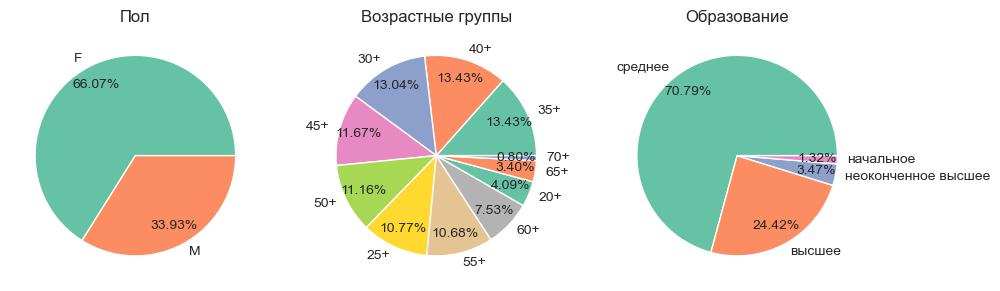

In [468]:
plot_three_pies('gender', 'Пол', 
                'age_group', 'Возрастные группы',
                'education', 'Образование')

In [469]:
for col in ['gender', 'age_group', 'education']:
    col
    clients[col].value_counts()

'gender'

F    14096
M     7239
Name: gender, dtype: int64

'age_group'

35+    2866
40+    2865
30+    2782
45+    2490
50+    2380
25+    2298
55+    2279
60+    1607
20+     872
65+     726
70+     170
Name: age_group, dtype: int64

'education'

среднее                15102
высшее                  5211
неоконченное высшее      741
начальное                281
Name: education, dtype: int64

Большинство клиентов в датасете
* женщины (66%),  
* клиенты со средним образованием (71%), далее с высшим образованием (24%), 
* возрастные группы распределены более-менее равномерно (10-13% на группу), кроме 20+ (4%), 65+ (3%) и 70+ (1%).

Теперь посмотрим **семейное положение, наличие детей и их количество**.

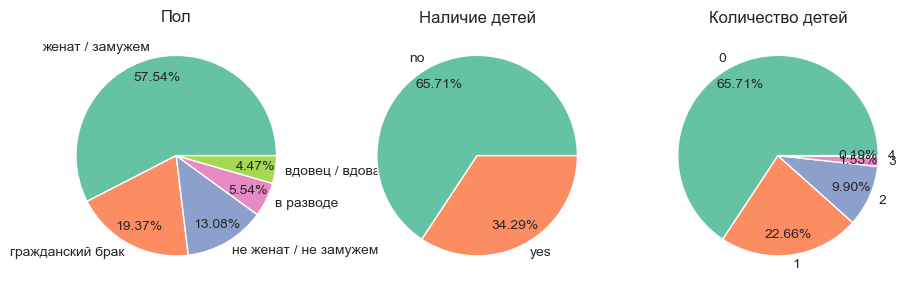

In [470]:
plot_three_pies('family_status', 'Пол', 
                'has_children', 'Наличие детей',
                'children', 'Количество детей')

In [471]:
for col in ['family_status', 'has_children', 'children']:
    col
    clients[col].value_counts()

'family_status'

женат / замужем          12277
гражданский брак          4133
не женат / не замужем     2790
в разводе                 1182
вдовец / вдова             953
Name: family_status, dtype: int64

'has_children'

no     14020
yes     7315
Name: has_children, dtype: int64

'children'

0    14020
1     4835
2     2112
3      327
4       41
Name: children, dtype: int64

Здесь мы видим, что большинство клиентов 
* замужем или женаты (57,5%),
* не имеют детей,
* те, у кого дети есть, имеют в основном одного ребенка - 65.5%).


Меньшинство
* с начальным (1%) или неоконченным высшим образованием (3%),
* в разводе (5,5%), 
* с двумя детьми (10%).

Теперь посмотрим на **тип дохода, категорию дохода и цели кредита**.

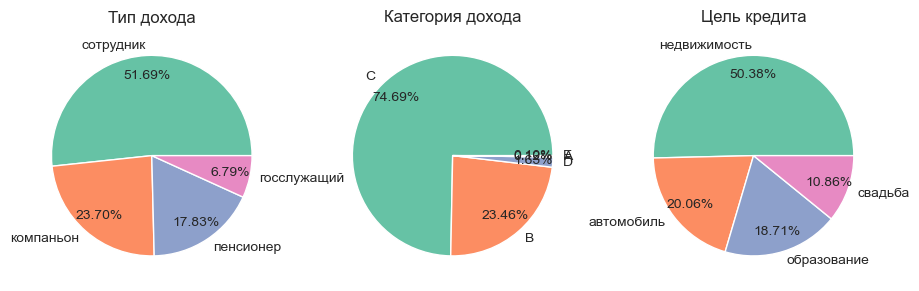

In [472]:
plot_three_pies('income_type', 'Тип дохода', 
                'income_category', 'Категория дохода',
               'purpose_category', 'Цель кредита')

In [473]:
for col in ['income_type', 'purpose_category', 'income_category']:
    col
    clients[col].value_counts()

'income_type'

сотрудник      11027
компаньон       5057
пенсионер       3803
госслужащий     1448
Name: income_type, dtype: int64

'purpose_category'

недвижимость    10748
автомобиль       4279
образование      3991
свадьба          2317
Name: purpose_category, dtype: int64

'income_category'

C    15936
B     5005
D      347
A       25
E       22
Name: income_category, dtype: int64

Наконец, в отношении дохода и целей кредита большинство
* имеют работу (сотрудники, 51.5%),
* берут кретит на недвижимость (50%), 
* относятся к категории доходов С (от 50 до 200 тыс)

Меньшинство
* госслужащие (7%),
* берут кредит на свадьбу (11%) 
* относятся к категории доходов А (от 1 млн), D (от 30 до 50 тыс), E (меньше 30 тыс). Категории малочисленны, поэтому на графике слились.



**Итого, большинство клиентов в датасете**
* без задолженностей,
* женщины,
* в возрасте 30-44 года,
* со средним образованием,
* замужем,
* без детей,
* сотрудники,
* имеют доход от 50 до 200 тыс.,
* берут кредит на недвижимость.

**Меньшинство клиентов**
* мужчины,
* в возрасте 20-24 и 65-74,
* с начальным образованием,
* вдовы/ вдовцы и в разводе,
* госслужащие,
* с доходом от выше 1 млн или ниже 30 тыс.,
* берут кредиты на свадьбу.

Теперь перейдем к числовым переменным.

### 3.2 Исследование дохода `total_income` по категориям<a id="step3.2"></a>   

Возраст мы уже посмотрели по возрастным категориям, поэтому сосредоточимся на `total_income`. Распределение самой переменной мы уже смотрели, когда заполняли пропуски (сильно скошено вправо из-за клиентов с очень высоким доходом).

Теперь посмотрим доход по различным группам. Напишем функции, чтобы удобно было выводить статистику и графики.

In [474]:
def plot_income_by_groups(group, title, hue=None):
    """
    строит boxplot
    """
    _ = plt.figure(figsize=(10,5))
    _ = sns.boxplot(data=clients, x='total_income', y=group, 
                    hue=hue, fliersize=4, linewidth=0.8)
    _ = plt.title(title)
    plt.show()

In [475]:
def income_by_groups(group):
    """
    выводит базовую статистику уровня дохода по какой-то группе, группу указывать в кавычках
    """
    stats = clients.groupby(group)['total_income'].describe().sort_values(by='50%', ascending=False)
    return stats

Начнем с **пола клиентов**.

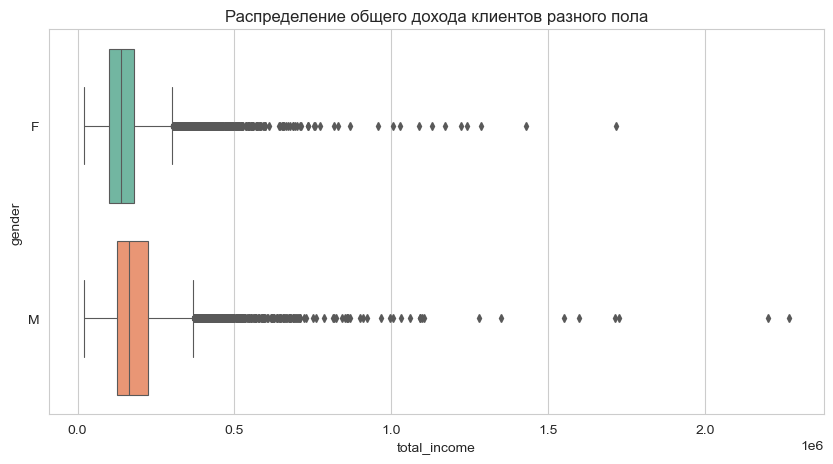

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
M,7239.000,189045.564,114998.383,21205.000,125455.000,163208.000,223001.500,2265604.000
F,14096.000,153206.073,85968.420,20667.000,99920.500,138003.500,181015.000,1715018.000


In [476]:
plot_income_by_groups('gender', 'Распределение общего дохода клиентов разного пола')
income_by_groups('gender')

У мужчин доход выше примерно на 25 тыс по медиане.

Теперь **по возрастным группам**.

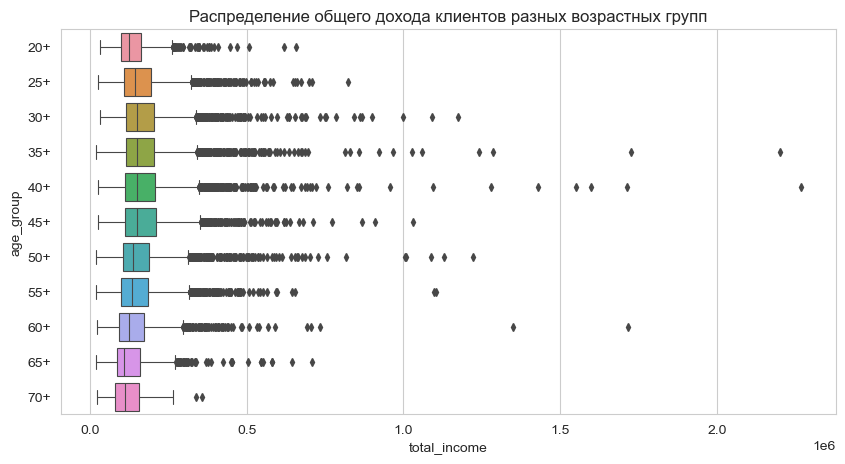

,count,mean,std,min,25%,50%,75%,max
age_group,,,,,,,,
45+,2490.000,174370.123,93861.185,26330.000,113973.000,152133.500,210219.250,1030899.000
35+,2866.000,176895.010,111726.659,21205.000,114398.000,151273.000,205535.500,2200852.000
40+,2865.000,177444.552,117254.476,25228.000,113712.000,151075.000,207738.000,2265604.000
30+,2782.000,173025.636,95031.318,32110.000,115503.500,149978.500,204683.000,1172460.000
25+,2298.000,164584.260,84095.952,28093.000,109856.500,145492.000,195393.250,822426.000
50+,2380.000,163100.851,99897.915,21368.000,105068.750,138108.500,189384.750,1223042.000
55+,2279.000,154889.519,86144.102,20667.000,100204.000,135976.000,186277.000,1103455.000
20+,872.000,140389.959,66496.538,32628.000,98699.750,125014.000,164379.250,658754.000
60+,1607.000,146906.364,93706.148,21896.000,93301.000,124926.000,174603.000,1715018.000


In [477]:
plot_income_by_groups('age_group', 'Распределение общего дохода клиентов разных возрастных групп')
income_by_groups('age_group')

Наибольший доход по медиане у людей стреднего возраста (группы 45+, 35+, 40+), наименьший - у 65+.

Теперь **образование**.

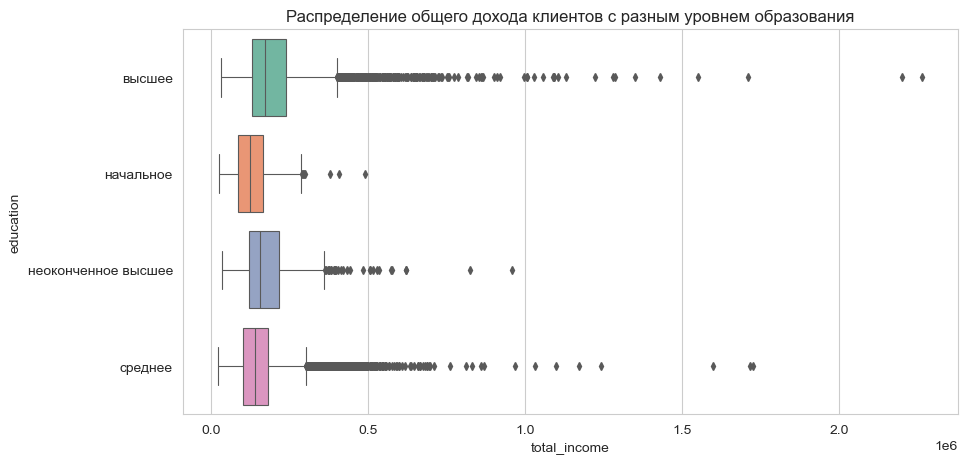

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
высшее,5211.000,201614.174,130043.155,32178.000,129567.500,169460.000,238224.000,2265604.000
неоконченное высшее,741.000,178346.158,93853.739,34466.000,118600.000,155493.000,214296.000,958435.000
среднее,15102.000,152833.455,81603.864,20667.000,101680.000,139326.500,181745.750,1726276.000
начальное,281.000,132515.452,65468.122,25309.000,84727.000,121920.000,165363.000,490067.000


In [478]:
plot_income_by_groups('education', 'Распределение общего дохода клиентов с разным уровнем образования')
income_by_groups('education')

В среднем клиенты с высшим образование имеют доход выше (около 170 тыс медианный), но еще в этой группе больше всего выбросов. За ними идут клиенты с неоконченным высшим (около 156 тыс медианный), со средним (около 139 тыс медианный) и с начальным (122 тыс). 

Дальше **семейное положение**.

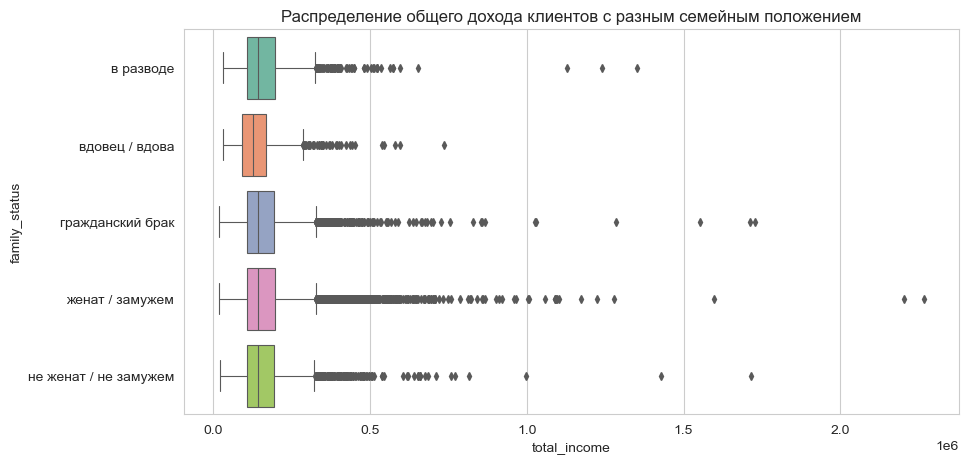

,count,mean,std,min,25%,50%,75%,max
family_status,,,,,,,,
в разводе,1182.000,168104.157,101382.103,33768.000,109929.000,145552.000,197115.750,1350246.000
женат / замужем,12277.000,166880.945,99700.552,20667.000,108199.000,144789.000,196932.000,2265604.000
гражданский брак,4133.000,164696.297,98440.907,21205.000,107431.000,144639.000,195867.000,1726276.000
не женат / не замужем,2790.000,166248.621,96327.511,24458.000,109614.250,144639.000,196057.750,1715018.000
вдовец / вдова,953.000,142784.604,75460.422,34024.000,92684.000,127310.000,170763.000,735103.000


In [479]:
plot_income_by_groups('family_status', 'Распределение общего дохода клиентов с разным семейным положением')
income_by_groups('family_status')

В данных группах тоже много выбросов, больше всего среди тех, кто женат/замужем, однако медианные значения не сильно отличаются (кроме группы "вдовец/ вдова", где оно заметно ниже - 127 тыс против 144+ тыс). Доход немного выше у тех, кто в разводе (145,5 тыс медианное значение).

Добавим теперь к семейному положению **наличие или отсутствие детей**.

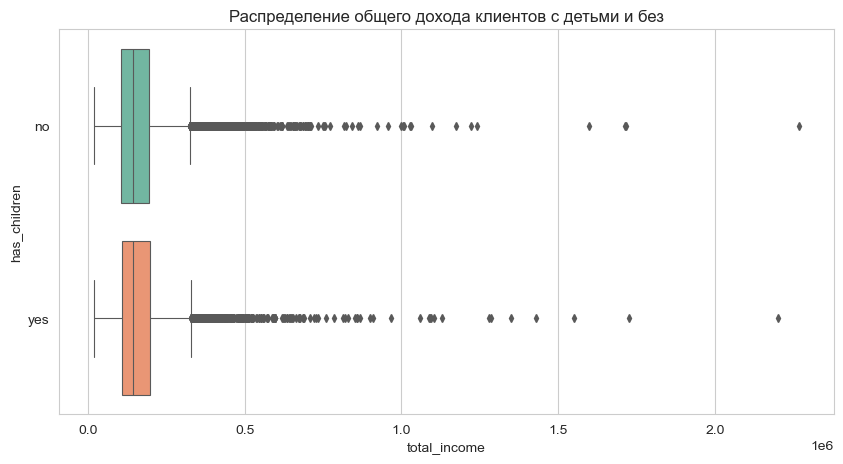

,count,mean,std,min,25%,50%,75%,max
has_children,,,,,,,,
yes,7315.000,169882.822,104061.452,21368.000,110612.500,145552.000,198580.500,2200852.000
no,14020.000,163010.043,95031.161,20667.000,105875.500,143546.000,193964.250,2265604.000


In [480]:
plot_income_by_groups('has_children', 'Распределение общего дохода клиентов с детьми и без')
income_by_groups('has_children')

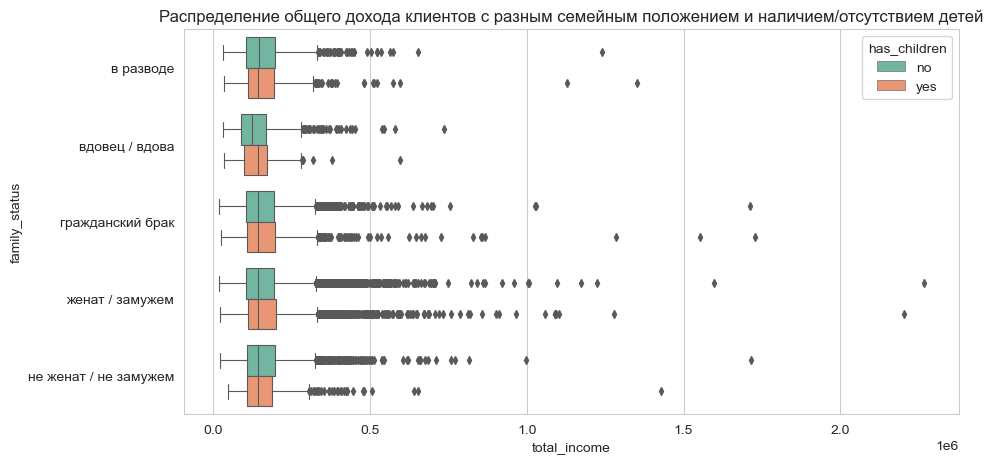

In [481]:
plot_income_by_groups('family_status', 
                      'Распределение общего дохода клиентов с разным семейным положением и наличием/отсутствием детей', 
                      hue='has_children')

Наличие или отсутствие детей не отражается на разнице в медианном доходе. Если добавить семейное положение, то только среди клиентов, которые потеряли супруга и не имеют детей, доход немного ниже.

Далее посмотрим, как сказывается **количество детей** на медианном доходе.

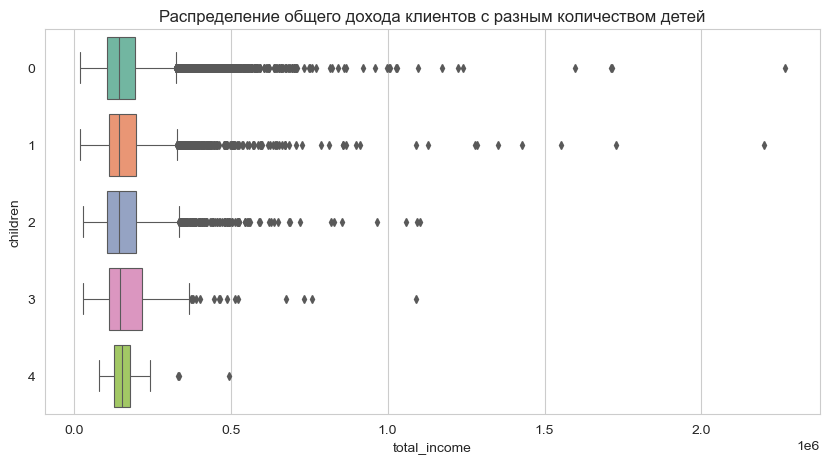

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
4,41.000,166858.878,76321.705,78901.000,126955.000,154702.000,179445.000,494338.000
3,327.000,180313.271,112737.272,30375.000,113781.500,146933.000,215864.500,1091628.000
1,4835.000,169227.104,104744.917,21368.000,111172.500,145578.000,198539.500,2200852.000
2,2112.000,169827.717,101507.174,28093.000,107169.250,144785.000,198083.000,1103455.000
0,14020.000,163010.043,95031.161,20667.000,105875.500,143546.000,193964.250,2265604.000


In [482]:
plot_income_by_groups('children', 'Распределение общего дохода клиентов с разным количеством детей')
income_by_groups('children')

Медианный доход выше всего у тех, у кого 4 детей, но и самая малочисленная группа. Меньше медианный доход у клиентов без детей или с двумя детьми.

Посмотрим на **тип дохода**.

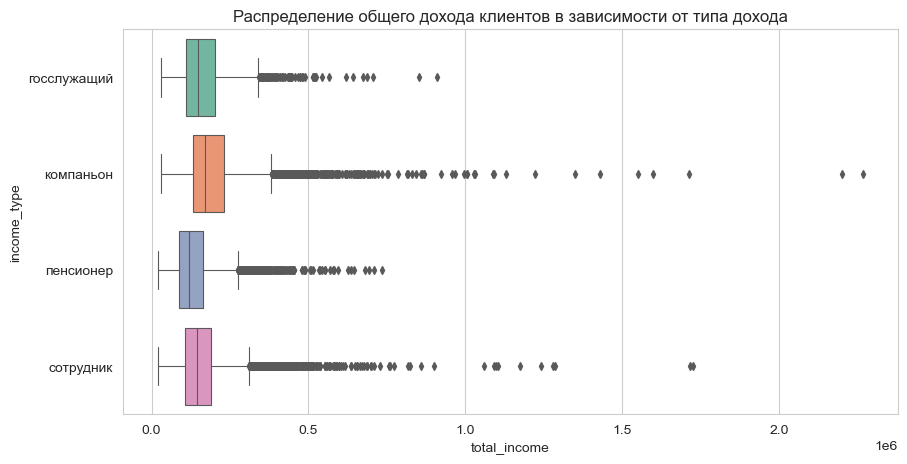

,count,mean,std,min,25%,50%,75%,max
income_type,,,,,,,,
компаньон,5057.000,199597.752,124400.174,28703.000,130724.000,171639.000,231396.000,2265604.000
госслужащий,1448.000,169021.610,92357.532,29200.000,109992.000,148991.000,201909.000,910451.000
сотрудник,11027.000,159522.187,87069.812,21368.000,106934.000,143546.000,188730.500,1726276.000
пенсионер,3803.000,135401.884,76277.097,20667.000,87047.000,119664.500,162395.000,735103.000


In [483]:
plot_income_by_groups('income_type', 'Распределение общего дохода клиентов в зависимости от типа дохода')
income_by_groups('income_type')

Выше всего медианный доход в группе "компаньон" (171 тыс), там же и самые далекие выбросы. Меньше всего у пенсионеров - 119,5 тыс.

Теперь **категория дохода**.

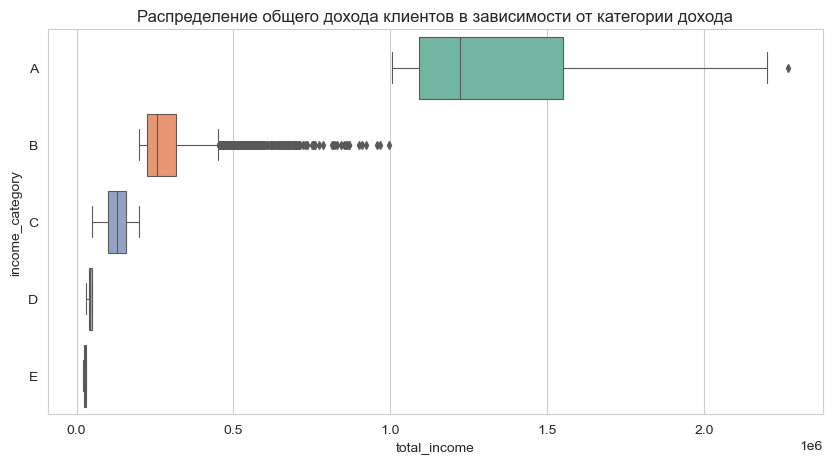

,count,mean,std,min,25%,50%,75%,max
income_category,,,,,,,,
A,25.000,1339118.240,356131.358,1004476.000,1091628.000,1223042.000,1551153.000,2265604.000
B,5005.000,286738.938,95036.113,200002.000,224481.000,257788.000,315523.000,997014.000
C,15936.000,128265.386,37191.418,50026.000,99347.250,130080.500,156807.500,199981.000
D,347.000,42889.360,5511.573,30076.000,39049.000,43786.000,47838.500,49996.000
E,22.000,25795.500,3118.020,20667.000,22816.000,26431.500,28550.500,29750.000


In [484]:
plot_income_by_groups('income_category', 
                      'Распределение общего дохода клиентов в зависимости от категории дохода')
income_by_groups('income_category')

Тут ожидаемо самая высокая медиана у группы А, а самая низкая - у группы Е. Но стоит отметить, что группа А отстоит от остальных дальше всего, а в группе В очень много выбросов.

Наконец, **цели, на которые брался кредит**.

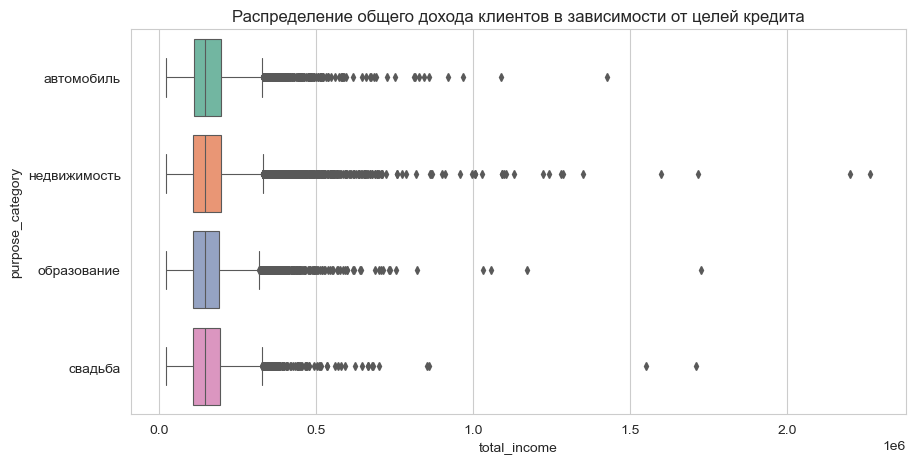

,count,mean,std,min,25%,50%,75%,max
purpose_category,,,,,,,,
недвижимость,10748.000,166712.110,102344.949,20667.000,108098.250,144785.000,196868.500,2265604.000
автомобиль,4279.000,165373.548,93415.211,21368.000,109013.000,144639.000,196937.000,1427934.000
образование,3991.000,162734.462,92972.057,21205.000,106164.000,144639.000,190631.500,1726276.000
свадьба,2317.000,163644.904,96550.294,21695.000,105882.000,144639.000,194748.000,1711309.000


In [485]:
plot_income_by_groups('purpose_category', 'Распределение общего дохода клиентов в зависимости от целей кредита')
income_by_groups('purpose_category')

Разницы в медианном доходе не видно.

**Итого, самый высокий медианный доход** у
* мужчин,
* клиентов с высшим образованием,
* в разводе,
* с детьми,
* с 3-4 детьми,
* с типом дохода "компаньон",
* в категориях дохода А и В.



И **самый низкий** у 
* женщин,
* клиентов с начальным образованием,
* вдовцов/ вдов,
* без детей (но разница всего в 2 тыс р.)
* пенсионеров,
* в категориях дохода D и E.

В отношении целей кредита медианных доход практически одинаковый.

### 3.3 Исследование наличия задолженности `debt` по категориям<a id="step3.3"></a>   

Перейдем к целевой переменной о наличии задолженности `debt`.

In [486]:
clients.debt.value_counts(normalize=True)

False   0.919
True    0.081
Name: debt, dtype: float64

Как мы уже смотрели, всего у 8% клиентов имеется задолженность. Посмотрим по группам. Сначала выведем график и таблицу по абсолютным значениям, а потом то же самое по соотношению наличия и отсутствия задолженности в одной группе. Для подсчета значений и построения графиков напишем функции.

In [487]:
def debt_count_by_groups(group):
    count = pd.crosstab(clients[group], clients['debt'])
    return count

In [488]:
def plot_count_debt_by_groups(group, title):
    """
    строит countplot
    """
    _ = plt.figure(figsize=(10,3))
    _ = sns.countplot(data=clients, y=group, hue='debt')
    _ = plt.title(title)
    plt.show()

In [489]:
def debt_ratio_by_groups(group):
    df = pd.crosstab(clients[group], clients['debt'], normalize='index')
    return df

In [490]:
def plot_ratio_debt_by_groups(df, title):
    """
    строит stacked barplot
    """
    _ = df.plot(kind='barh', stacked=True, figsize=(10,3))
    _ = plt.legend(bbox_to_anchor=(1, 1))
    _ = plt.title(title)
    plt.show()

По **полу клиентов**

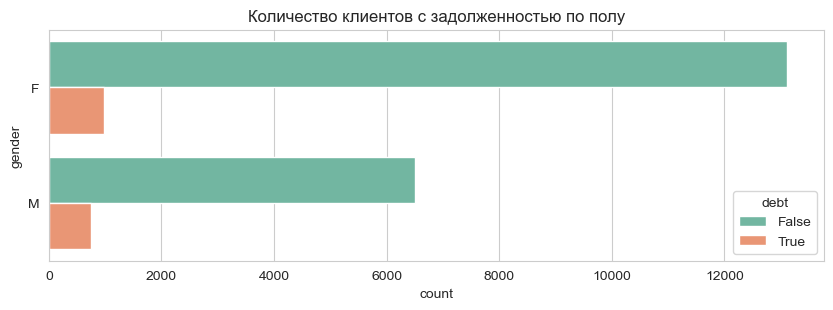

debt,False,True
gender,,
F,13108,988
M,6497,742


In [491]:
plot_count_debt_by_groups('gender', 
                          'Количество клиентов с задолженностью по полу')
children_num_debt = debt_count_by_groups('gender')
children_num_debt

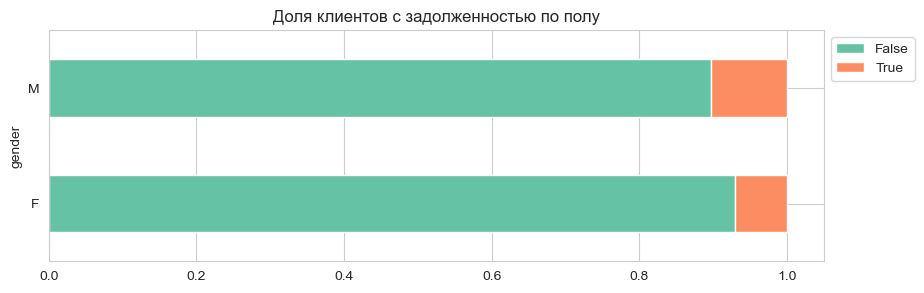

debt,False,True
gender,,
F,0.930,0.070
M,0.897,0.103


In [492]:
children_num_ratio_debt = debt_ratio_by_groups('gender')
plot_ratio_debt_by_groups(children_num_ratio_debt, 'Доля клиентов с задолженностью по полу')
children_num_ratio_debt

По количеству больше задолженностей у женщин, так как это более многочисленная группа, но внутри группы большая доля задолженности у мужчин (10.3% против 7% у женщин).

По **возрастной группе**.

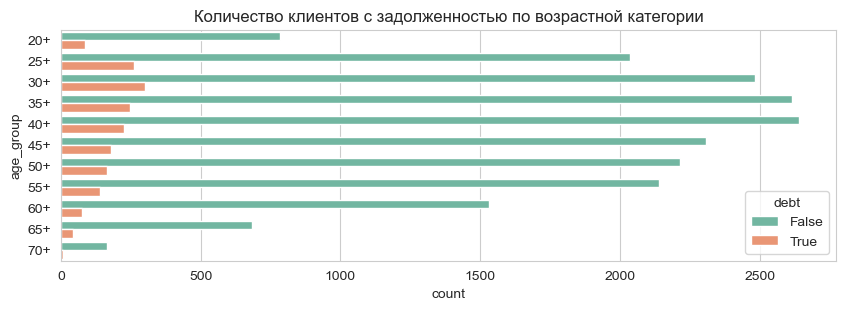

debt,False,True
age_group,,
20+,784,88
25+,2037,261
30+,2482,300
35+,2617,249
40+,2641,224
45+,2310,180
50+,2215,165
55+,2139,140
60+,1533,74


In [493]:
plot_count_debt_by_groups('age_group', 
                          'Количество клиентов с задолженностью по возрастной категории')
age_count_debt = debt_count_by_groups('age_group')
age_count_debt

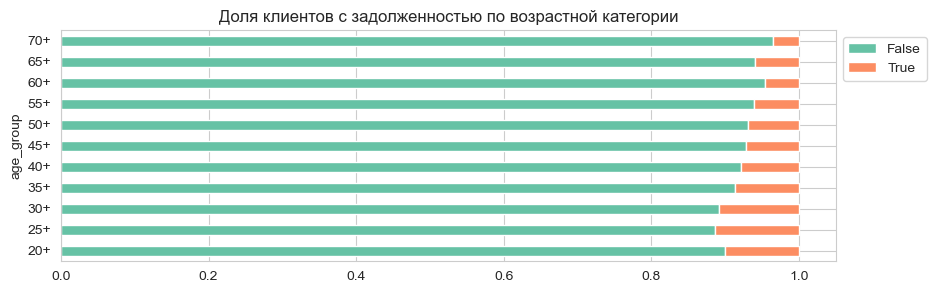

debt,False,True
age_group,,
20+,0.899,0.101
25+,0.886,0.114
30+,0.892,0.108
35+,0.913,0.087
40+,0.922,0.078
45+,0.928,0.072
50+,0.931,0.069
55+,0.939,0.061
60+,0.954,0.046


In [494]:
age_ratio_debt = debt_ratio_by_groups('age_group')
plot_ratio_debt_by_groups(age_ratio_debt, 'Доля клиентов с задолженностью по возрастной категории')
age_ratio_debt

Количественно и по доле внутри группы больше всего задолженности в группе 25-29 лет (11.4%). Чуть меньше у 30-34летних (10.8%). По долям внутри группы видно, что доля задолженности скорее уменьшается с возрастом (6% и ниже у 55+).


По **образованию**.

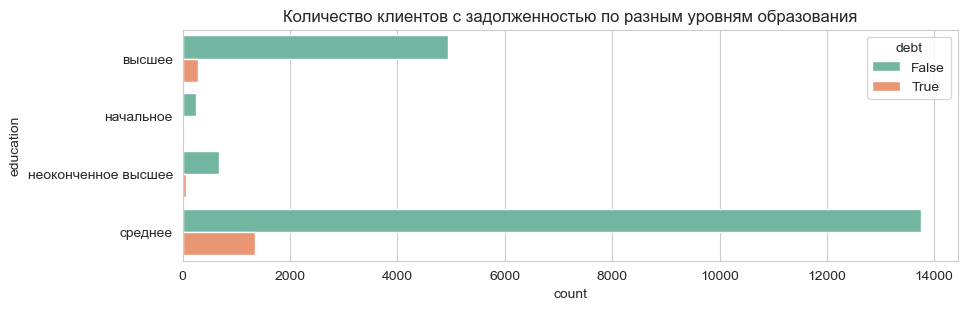

debt,False,True
education,,
высшее,4934,277
начальное,250,31
неоконченное высшее,673,68
среднее,13748,1354


In [495]:
plot_count_debt_by_groups('education', 
                          'Количество клиентов с задолженностью по разным уровням образования')
educ_count_debt = debt_count_by_groups('education')
educ_count_debt

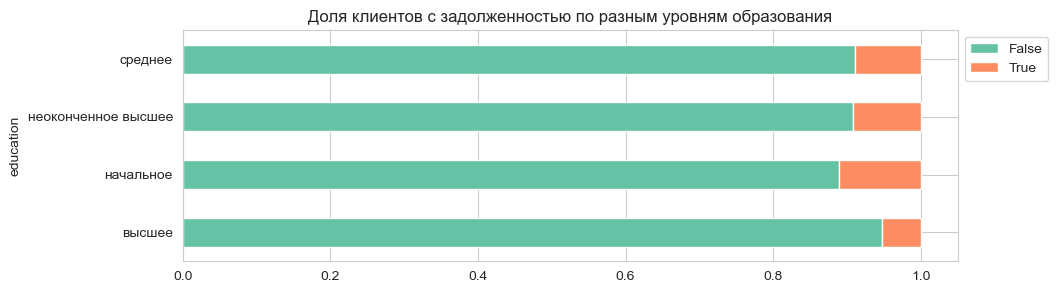

debt,False,True
education,,
высшее,0.947,0.053
начальное,0.890,0.110
неоконченное высшее,0.908,0.092
среднее,0.910,0.090


In [496]:
educ_ratio_debt = debt_ratio_by_groups('education')
plot_ratio_debt_by_groups(educ_ratio_debt, 'Доля клиентов с задолженностью по разным уровням образования')
educ_ratio_debt

Количественно больше всего задолженности у клиентов со средним образованием, но это и самая многочисленная группа. По доли больше всего задолженности у клиентов с начальным образованием (11% против 5.3% у клиентов с высшим образованием). 

По **семейному положению**.

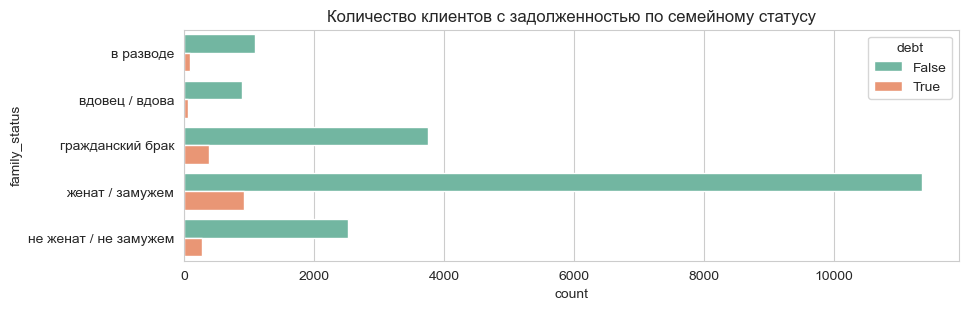

debt,False,True
family_status,,
в разводе,1097,85
вдовец / вдова,891,62
гражданский брак,3747,386
женат / замужем,11353,924
не женат / не замужем,2517,273


In [497]:
plot_count_debt_by_groups('family_status', 
                          'Количество клиентов с задолженностью по семейному статусу')
family_count_debt = debt_count_by_groups('family_status')
family_count_debt

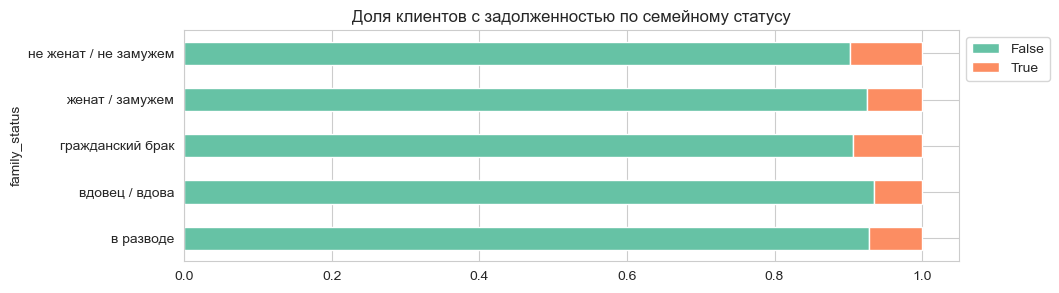

debt,False,True
family_status,,
в разводе,0.928,0.072
вдовец / вдова,0.935,0.065
гражданский брак,0.907,0.093
женат / замужем,0.925,0.075
не женат / не замужем,0.902,0.098


In [498]:
family_ratio_debt = debt_ratio_by_groups('family_status')
plot_ratio_debt_by_groups(family_ratio_debt, 'Доля клиентов с задолженностью по семейному статусу')
family_ratio_debt

Количественно - у тех, кто женат или замужем (самая многочисленная группа), а по долям - у тех, не женат или не замужем (9.8%) или у тех, кто в гражданском браке (9.3%). Меньше - у тех, кто в разводе (6.5%). 

По **наличию или отсутствию детей**.

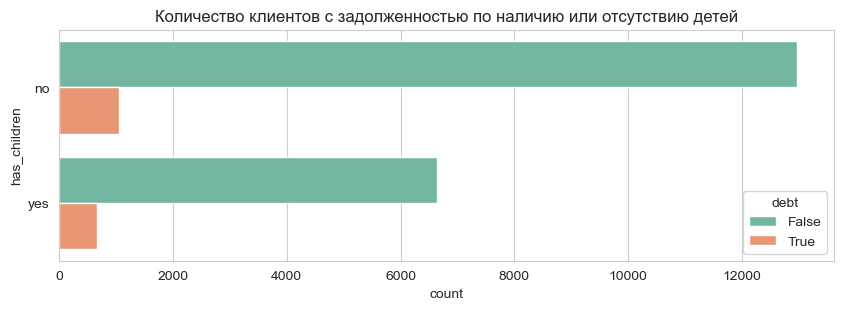

debt,False,True
has_children,,
no,12963,1057
yes,6642,673


In [499]:
plot_count_debt_by_groups('has_children', 
                          'Количество клиентов с задолженностью по наличию или отсутствию детей')
children_count_debt = debt_count_by_groups('has_children')
children_count_debt

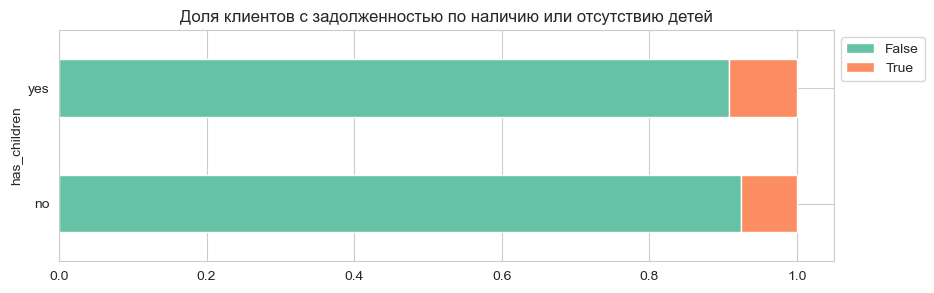

debt,False,True
has_children,,
no,0.925,0.075
yes,0.908,0.092


In [500]:
children_ratio_debt = debt_ratio_by_groups('has_children')
plot_ratio_debt_by_groups(children_ratio_debt, 'Доля клиентов с задолженностью по наличию или отсутствию детей')
children_ratio_debt

Количественно у клиентов без детей, а по долям наоборот, с детьми (9.2), разница составляет 1.7%.


По **количеству детей**.

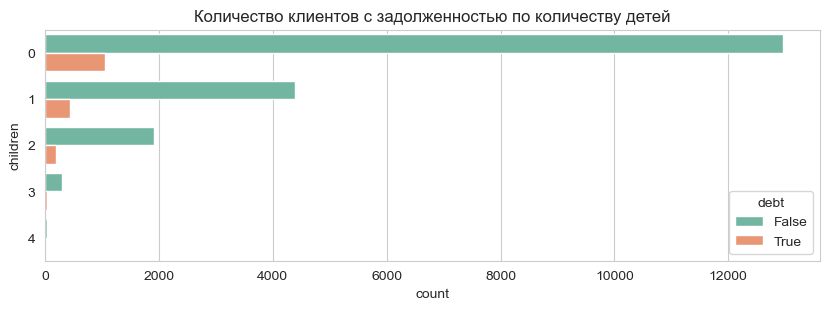

debt,False,True
children,,
0,12963,1057
1,4394,441
2,1911,201
3,300,27
4,37,4


In [501]:
plot_count_debt_by_groups('children', 
                          'Количество клиентов с задолженностью по количеству детей')
children_num_debt = debt_count_by_groups('children')
children_num_debt

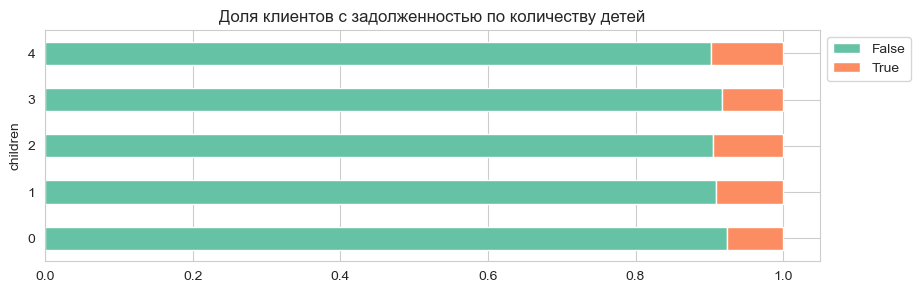

debt,False,True
children,,
0,0.925,0.075
1,0.909,0.091
2,0.905,0.095
3,0.917,0.083
4,0.902,0.098


In [502]:
children_num_ratio_debt = debt_ratio_by_groups('children')
plot_ratio_debt_by_groups(children_num_ratio_debt, 'Доля клиентов с задолженностью по количеству детей')
children_num_ratio_debt

Здесь опять же, количественно задолженности больше у тех, у кого нет детей. Но по соотношениям внутри группы - у кого 4 (9.8%), 2 ребенка (9.5%) или 1 ребенок (9.1%). 


По **типу дохода**.

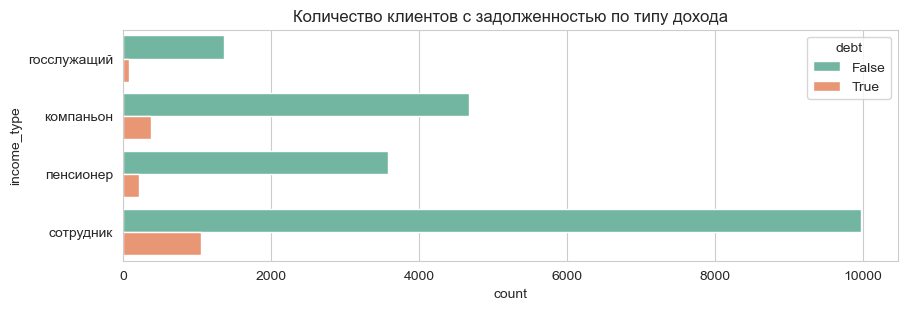

debt,False,True
income_type,,
госслужащий,1362,86
компаньон,4682,375
пенсионер,3589,214
сотрудник,9972,1055


In [503]:
plot_count_debt_by_groups('income_type', 
                          'Количество клиентов с задолженностью по типу дохода')
inc_type_count_debt = debt_count_by_groups('income_type')
inc_type_count_debt

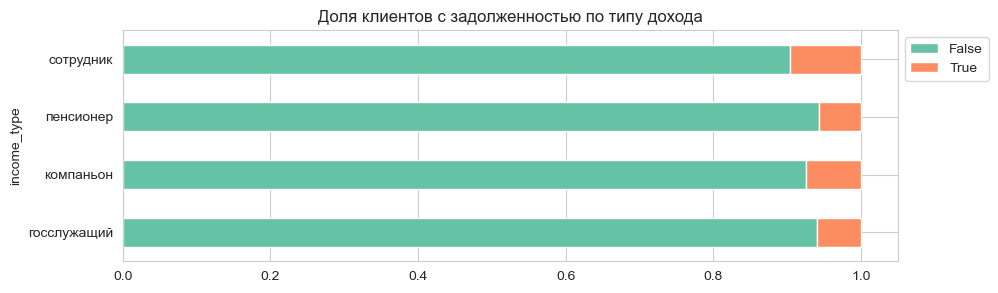

debt,False,True
income_type,,
госслужащий,0.941,0.059
компаньон,0.926,0.074
пенсионер,0.944,0.056
сотрудник,0.904,0.096


In [504]:
inc_type_ratio_debt = debt_ratio_by_groups('income_type')
plot_ratio_debt_by_groups(inc_type_ratio_debt, 'Доля клиентов с задолженностью по типу дохода')
inc_type_ratio_debt

Количественно у сотрудников, по долям - у них же (9.6%). Меньше всего у госслужащих (5.9%) и пенсионеров (по 5.6%).

Теперь по **категории дохода**.

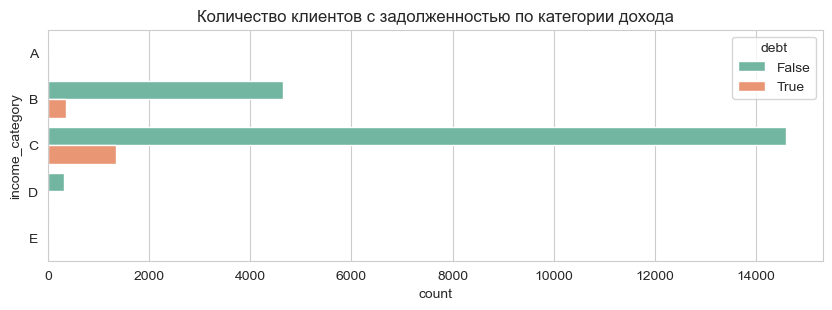

debt,False,True
income_category,,
A,23,2
B,4650,355
C,14586,1350
D,326,21
E,20,2


In [505]:
plot_count_debt_by_groups('income_category', 
                          'Количество клиентов с задолженностью по категории дохода')
inc_type_num_debt = debt_count_by_groups('income_category')
inc_type_num_debt

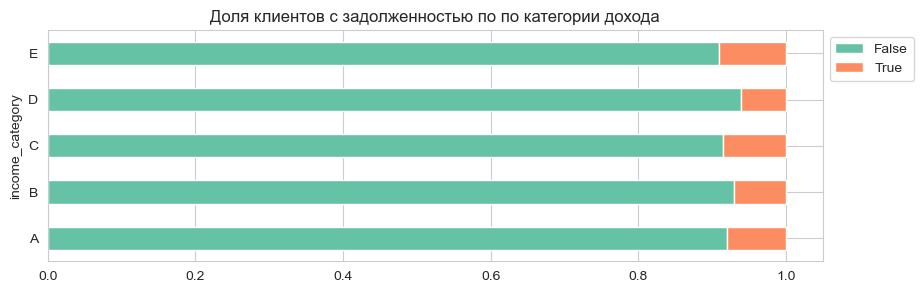

debt,False,True
income_category,,
A,0.920,0.080
B,0.929,0.071
C,0.915,0.085
D,0.939,0.061
E,0.909,0.091


In [506]:
inc_type_ratio_debt = debt_ratio_by_groups('income_category')
plot_ratio_debt_by_groups(inc_type_ratio_debt, 
                          'Доля клиентов с задолженностью по по категории дохода')
inc_type_ratio_debt

Количественно в группе С как самой многочисленной, внутри групп - в группе Е, т.е. до 30 тыс (9.1%), а меньше - в группе D, т.е. 30-50 тыс. (6.1%).

По **цели кредита**

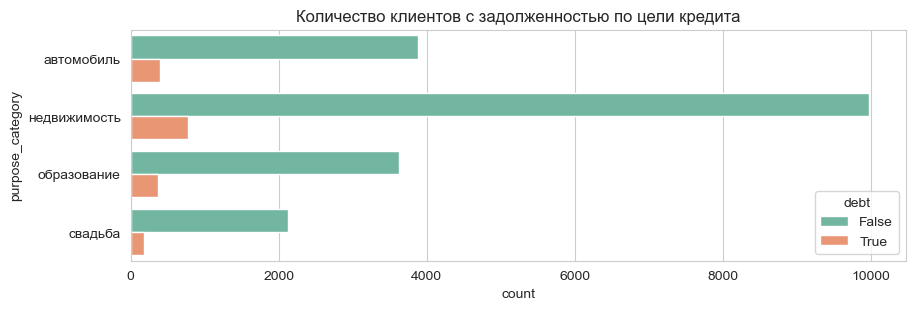

debt,False,True
purpose_category,,
автомобиль,3881,398
недвижимость,9970,778
образование,3621,370
свадьба,2133,184


In [507]:
plot_count_debt_by_groups('purpose_category', 
                          'Количество клиентов с задолженностью по цели кредита')
purpose_debt = debt_count_by_groups('purpose_category')
purpose_debt

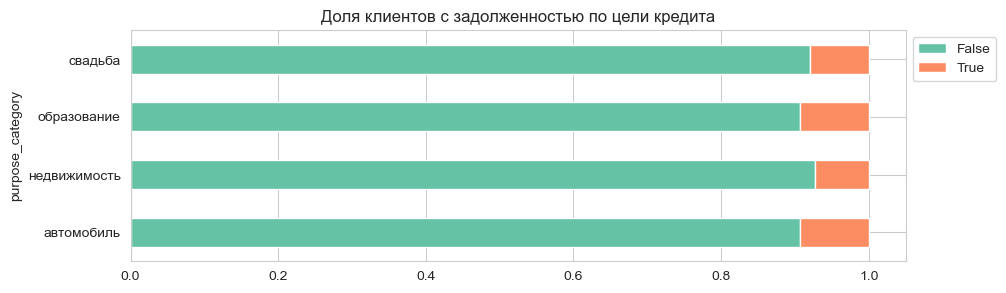

debt,False,True
purpose_category,,
автомобиль,0.907,0.093
недвижимость,0.928,0.072
образование,0.907,0.093
свадьба,0.921,0.079


In [508]:
purpose_ratio_debt = debt_ratio_by_groups('purpose_category')
plot_ratio_debt_by_groups(purpose_ratio_debt, 'Доля клиентов с задолженностью по цели кредита')
purpose_ratio_debt

Количественно - у тех, кто берет на недвижимость, а по долям - у тех, кто берет на автомобить и на образование (по 9.3%).

Так как основные выводы по этой части совпадают с ответом на поставленную задачу, а именно определить, что влияет на погашение кредита в срок, вынесем их ниже.

## 4. Выводы по поставленной задаче<a id="step4"></a>   

Были проанализированы данные клиентов банка с целью определить, какие факторы (начилие и количество детей, семейное положеные, уровень доходов и цели кредитов) влияют на погашение кредита в срок.

После предварительного осмотра данных были:
* определены столбцы с отсутствующими значениями;
* определены стратегии очистки и подготовки данных;
* произведены замены типов данных;
* заполнены отсутсвующие значения (медианы по с разными группировками).

Для категоризации данных была произведена лемматизация данных столбца `purpose`, а также добавлены столбцы: по уровню дохода - `income_status`, по главной цели кредита - `purpose_category`, по наличию/ отсутствию детей - `has_children`, `age_group` (20+, 25+ до 75+).

Далее был проведен исследовательский анализ данных и в ходе него обнаружены и удалены немногочисленные группы (например, 6 клиентов с ученой степенью и 2 предприниматель), а также группы, где нельзя было заполнить пропуски (клиентв с нулевым возрастом). 

В ходе анализа категорий, было обнаружено, что большинство клиентов в датасете 
* без задолженностей (92%),
* женщины (66%),
* в возрасте 30-44 года (39%),
* со средним образованием (71%),
* замужем (58%),
* без детей (66%),
* сотрудники (52%),
* имеют доход от 50 до 200 тыс. (75%),
* берут кредит на недвижимость (50%).

Меньшинство клиентов

* мужчины (34%),
* в возрасте 20-24 (4%) и 65-74 (12%),
* с начальным образованием (1%),
* вдовы/ вдовцы и в разводе (4%),
* госслужащие (7%),
* с доходом от выше 1 млн или ниже 30 тыс.(меньше 1%),
* берут кредиты на свадьбу (11%).

**Итого**, в количественном отношении наличие задолженностей в основном соответствует размерам групп, а в процентном соотношении внутри групп **повышенный процент (9-11% против среднего в 8%) встречается** у 
* у мужчин(10.3%),
* у 25-34летних (11%),
* у клиентов с начальным образованием (11%),
* у тех, кто не женат/ не замужем (9.8%) и кто находится в гражданском браке (9.3%,
* с 4мя (9.8%) или 2мя детьми (9.5%),
* у сотрудников (9.6%),
* в категории дохода E (до 30ти тыс.) (9.1%)
* у тех, кто брал на автомобиль или образование (9.3%).

**Пониженный процент задолженностей (4-7%)** у 
* женщин ((7%),
* в возрасте 55-74 (6% и ниже),
* с высшим образованием (5.3%),
* в разводе (7.2%)или у вдов/ вдовцов (6.5%),
* без детей (7.5%),
* у госслужащих (5.9%) и пенсионеров (5.6%),
* с доходом 30-50 тыс (категория D) (6.1%),
* тех, кто брал на недвижимость (7.2%).

## 5*. Сравнение двух версий выполнения проекта<a id="step5"></a>   

* Задача была переформулирована на "что влияет на возвращение кредита в срок" с "влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок", для большей глубины исследования.
* Был изменен порядок очистки столбцов: в первой версии столбцы брались по порядку как шли в датасете, в этой они были разделены по типам переменных - булевы, категории, числовые, объекты, что позволило лучше структурировать очистку данных; 
* Были удалены маленькие группы (меньше 20 человек в группе, например, с ученой степенью), соответственно, они не фигурировали в выводах. В первой версии факт наличия нерепрезентативных групп был полностью упущен;
* Был проведен подробный анализ столбца с указанием стажа, и удален по причине своей неинформативности (в первой версии пропуски были просто заполнены медианой и дальше столбец нигде не использовался);
* Заполнение пропусков столбца с ежемесячным доходом было сделано по двум группировкам - тип дохода и возрастная группа. В первой версии возрастная группа не учитывалась, следовательно медиана только по 4м группам меняла распределение на более центрированное;
* Строки с нулевым возрастом были удалены (в первой версии заполнены медианой по типу дохода), так как разница между минимальным и максимальным возрастом в каждой группе по типу дохода была велика. Также были удалены строки "молодых пенсионеров" (возрастом младше 33) как противоречивые по своей природе. В первой версии это было упущено;
* Категории дохода были сделаны иначе (по появившейся информации на курсе) - по конкретным значениям. В первой версии для разделения использовались квантили. Здесь остался вопрос, как лучше.
* Лемматизация сделана без использования PyMystem3 просто прописав леммы в функции, так как он не запустился на Anaconda и локальном компьютере. Были попытки сделать лемматизацию через nltk, но русские слова лемматизировались неправильно.
* Был проведен подробный исследовательский анализ данных для описания датасета и построены графики для одномерного и двумерного анализа. Для выведения информации были использованы функции.
* Вместо `pivot_table()` + `melt()` для определения процента задолженностей был использован `pd.crosstab()` как более лаконичный. 

## Оставшиеся вопросы

Как разделить на категории дохода статистически?


Надо смотреть на корреляции между `debt` и столбцами? каким методом? надо проводить статистические тесты? или для этого нужна другая выборка? Или исследовательского анализа достаточно для ответа на вопросы, и просто надо обобщить получше?


Надо делать сегментацию клиетов?


Надо подготовить отдельный датасет для машинного обучения?